<a href="https://colab.research.google.com/github/veyselalevcan/Marketing_Data_Analysis_ML/blob/main/Marketing_Data_Analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Dataset

### Context
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service.

### Content
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response (target)**: 1 if customer accepted the offer in the last campaign, 0 otherwise
- **Complain**: 1 if customer complained in the last 2 years
- **DtCustomer**: Date of customer’s enrolment with the company
- **Education**: Customer’s level of education
- **Marital**: Customer’s marital status
- **Kidhome**: Number of small children in customer’s household
- **Teenhome**: Number of teenagers in customer’s household
- **Income**: Customer’s yearly household income
- **MntFishProducts**: Amount spent on fish products in the last 2 years
- **MntMeatProducts**: Amount spent on meat products in the last 2 years
- **MntFruits**: Amount spent on fruits products in the last 2 years
- **MntSweetProducts**: Amount spent on sweet products in the last 2 years
- **MntWines**: Amount spent on wine products in the last 2 years
- **MntGoldProds**: Amount spent on gold products in the last 2 years
- **NumDealsPurchases**: Number of purchases made with discount
- **NumCatalogPurchases**: Number of purchases made using catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebPurchases**: Number of purchases made through company’s web site
- **NumWebVisitsMonth**: Number of visits to company’s web site in the last month
- **Recency**: Number of days since the last purchase

### Acknowledgements
O. Parr-Rud. *Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner*. SAS Institute, 2014.

### Inspiration
The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.


In [97]:
!pip install catboost

In [98]:
import joblib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# !pip install catboost
# !pip install lightgbm
# !pip install xgboost

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/marketing_campaign.csv', sep=';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [99]:
df = data.copy()

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)


##################### Shape #####################
(2240, 29)
##################### Types #####################
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response             

In [100]:
df.sort_values('Income', ascending=False)[:50]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,3,11,0
646,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,3,11,1


In [101]:
df['Income'].interpolate(method='linear', inplace=True)

In [102]:
df['Total_Purchases'] = df['NumWebPurchases']  + df['NumStorePurchases']
df['Total_Mnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Total_Mnt
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,18,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,6,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,11,422


In [103]:
df['NumWebVisitsMonth'].sum()

11909

In [104]:
df['NumWebPurchases'].loc[(df['Recency']<= 30)].sum()

3014

In [105]:
df['NumWebPurchases'].loc[(df['Recency']<= 30)].sum() * 100 / df['NumWebPurchases'].sum()

32.939890710382514

In [106]:
df['Total_Purchases'].loc[(df['Recency']<= 30)].sum()

7210

In [107]:
df.groupby(['ID', 'Complain']).agg({'Total_Purchases': ['sum'],
                                    'Total_Mnt': ['sum']}).sort_values('Complain', ascending=False)

,,Total_Purchases,Total_Mnt
,,sum,sum
ID,Complain,,
10401,1,3,18
255,1,4,21
6742,1,3,11
6730,1,5,54
10995,1,7,92
...,...,...,...
3712,0,9,259
3711,0,16,1902


In [108]:
# Tarih sütununu datetime formatına çevirelim
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Analiz tarihi olan 30-06-2014 tarihini datetime formatında tanımlayalım
analysis_date = pd.to_datetime('2014-06-30')
df['T'] = (analysis_date - df['Dt_Customer']).dt.days
df['T'].head()

,T
0,664
1,114
2,313
3,140
4,162


In [109]:
df['Age'] = 2014 - df['Year_Birth']

df.drop('Year_Birth', axis=1, inplace=True)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Total_Mnt,T,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,1617,664,57
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3,27,114,60
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,18,776,313,49
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,6,53,140,30
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,11,422,162,33


In [110]:
df['Response'].value_counts()

,count
Response,
0,1906
1,334


In [111]:
no_accept_ID = df.loc[(df['Response']==0) &
          (df['AcceptedCmp1']==0) &
          (df['AcceptedCmp2']==0) &
          (df['AcceptedCmp3']==0) &
          (df['AcceptedCmp4']==0) &
          (df['AcceptedCmp5']==0), 'ID']

no_accept_ID.to_csv('no_accept_ID.csv', index=False)


In [112]:
target_ID = df[~df['ID'].isin(no_accept_ID)]['ID']

In [113]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
df[cat_cols].nunique()


,0
Education,5
Marital_Status,8
Kidhome,3
Teenhome,3
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp5,2
AcceptedCmp1,2
AcceptedCmp2,2
Complain,2


            Education  Ratio
Education                   
Graduation       1127     50
PhD               486     21
Master            370     16
2n Cycle          203      9
Basic              54      2
##########################################


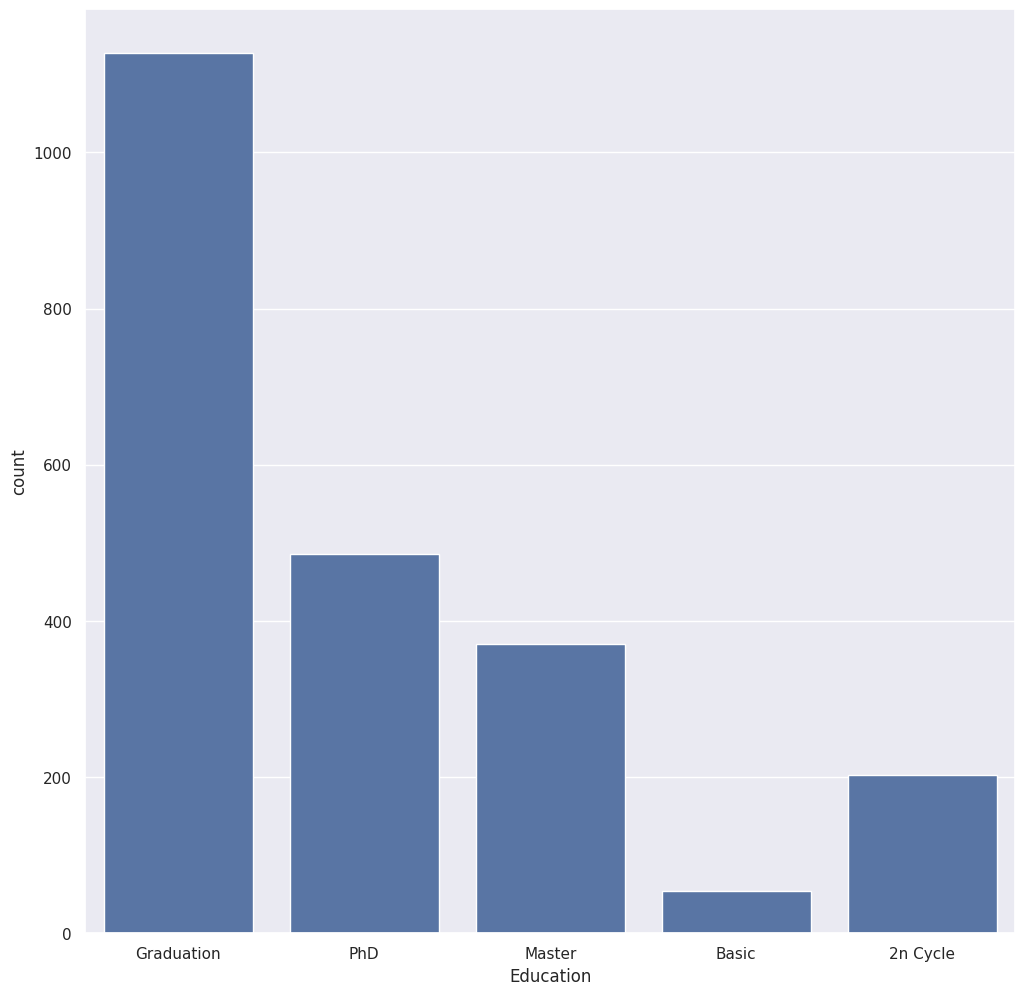

                Marital_Status  Ratio
Marital_Status                       
Married                    864     38
Together                   580     25
Single                     480     21
Divorced                   232     10
Widow                       77      3
Alone                        3      0
Absurd                       2      0
YOLO                         2      0
##########################################


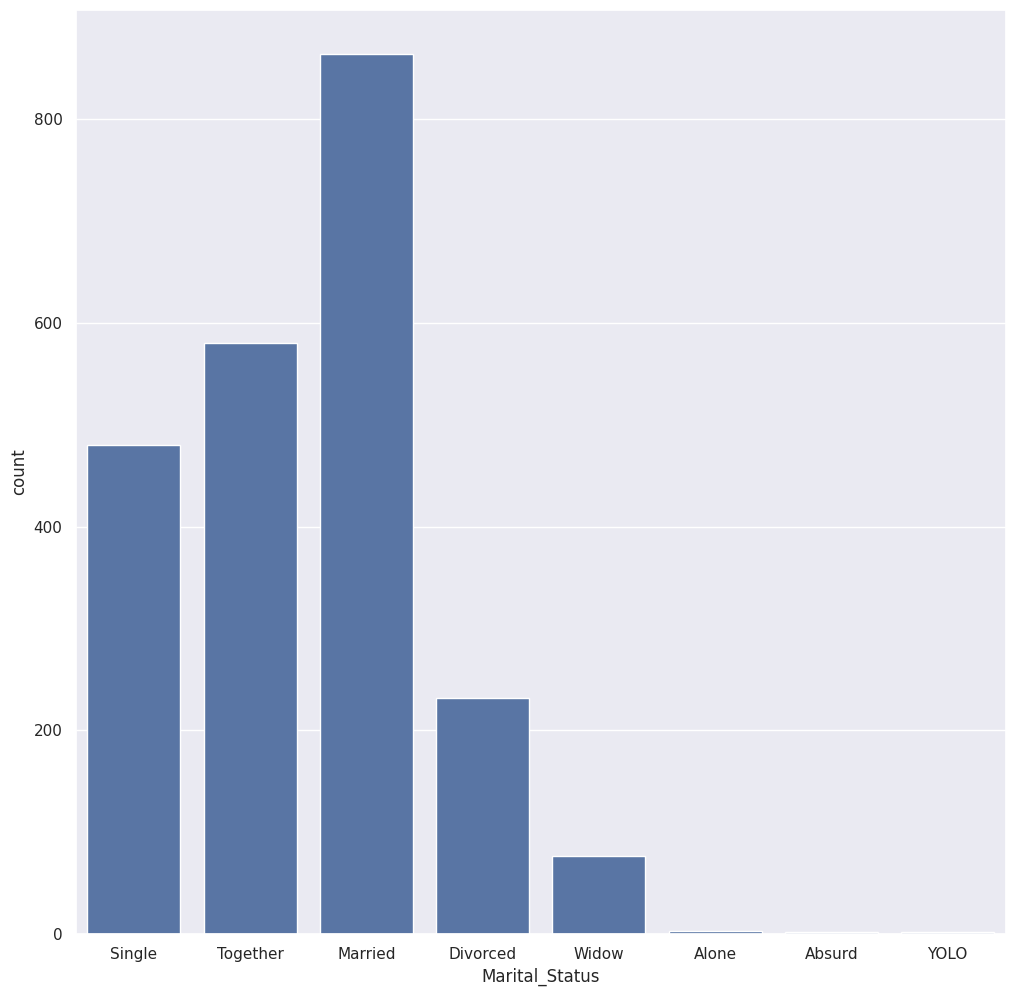

         Kidhome  Ratio
Kidhome                
0           1293     57
1            899     40
2             48      2
##########################################


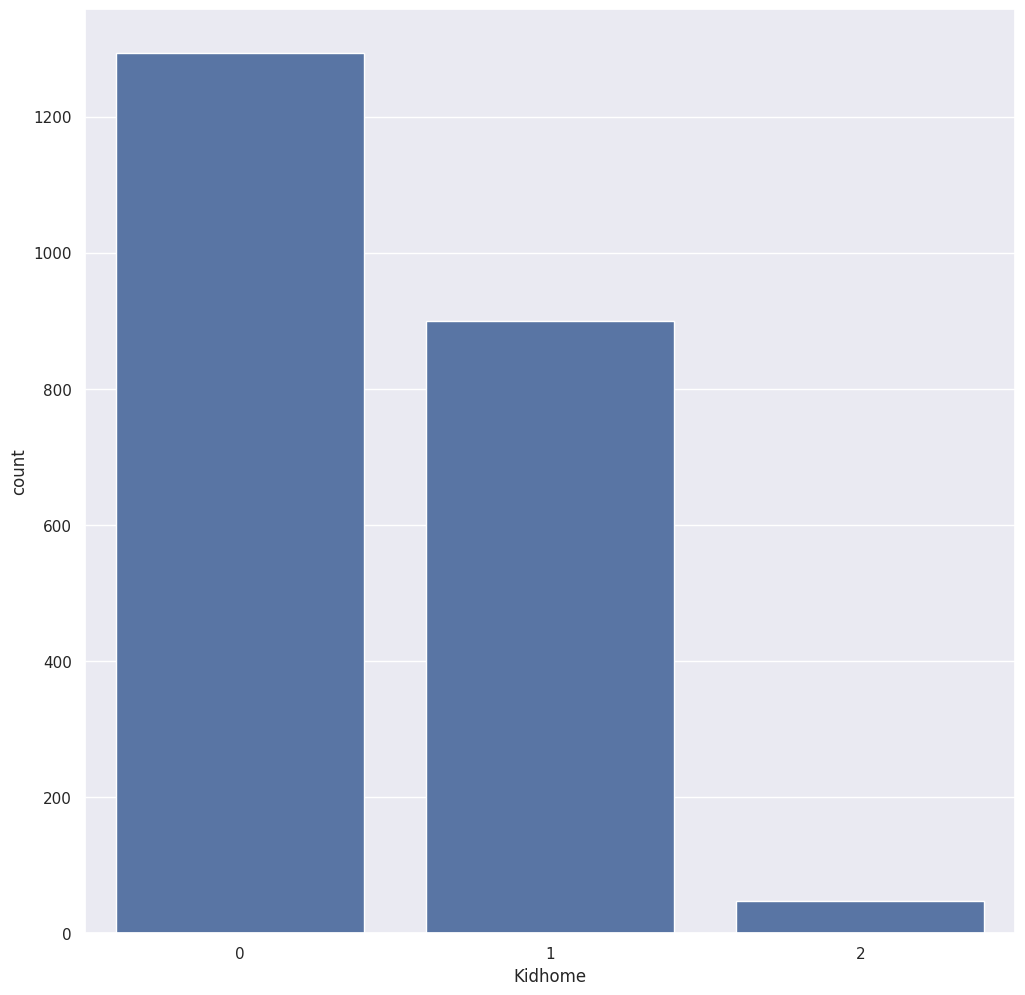

          Teenhome  Ratio
Teenhome                 
0             1158     51
1             1030     45
2               52      2
##########################################


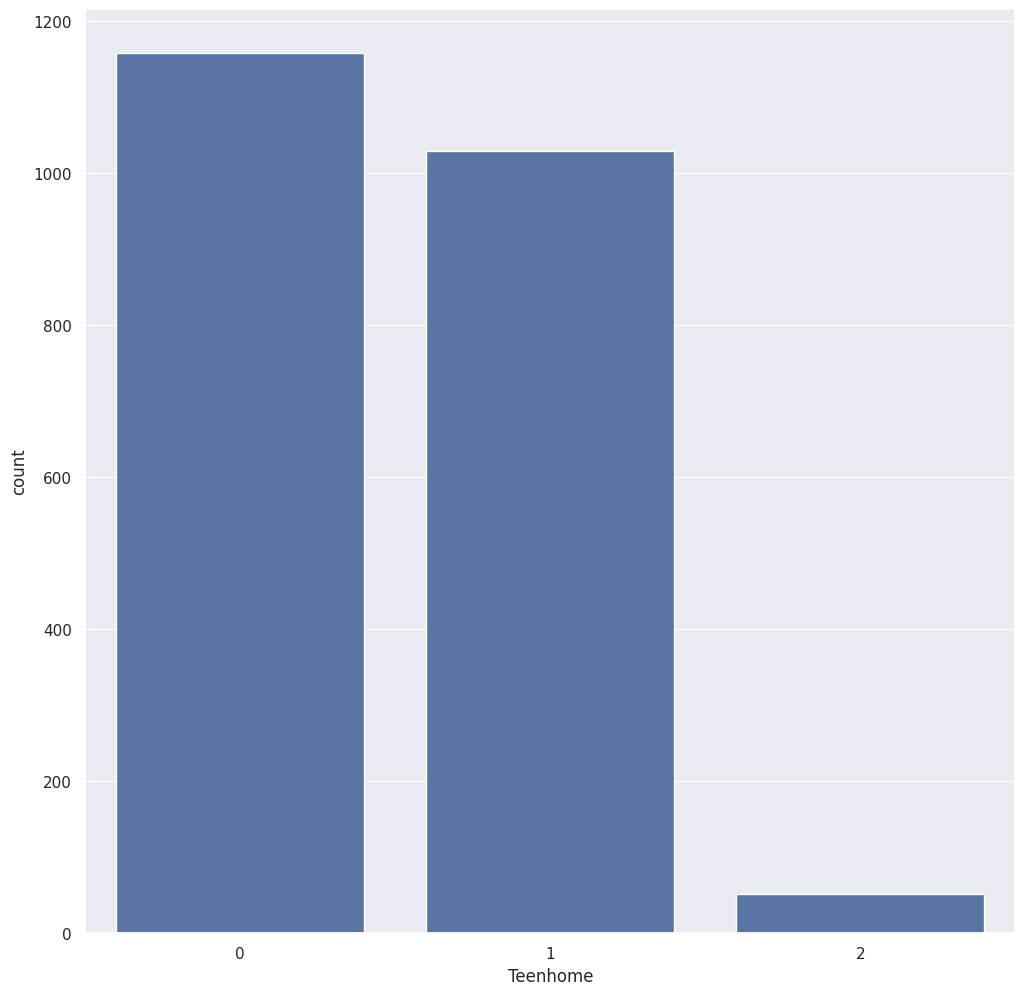

              AcceptedCmp3  Ratio
AcceptedCmp3                     
0                     2077     92
1                      163      7
##########################################


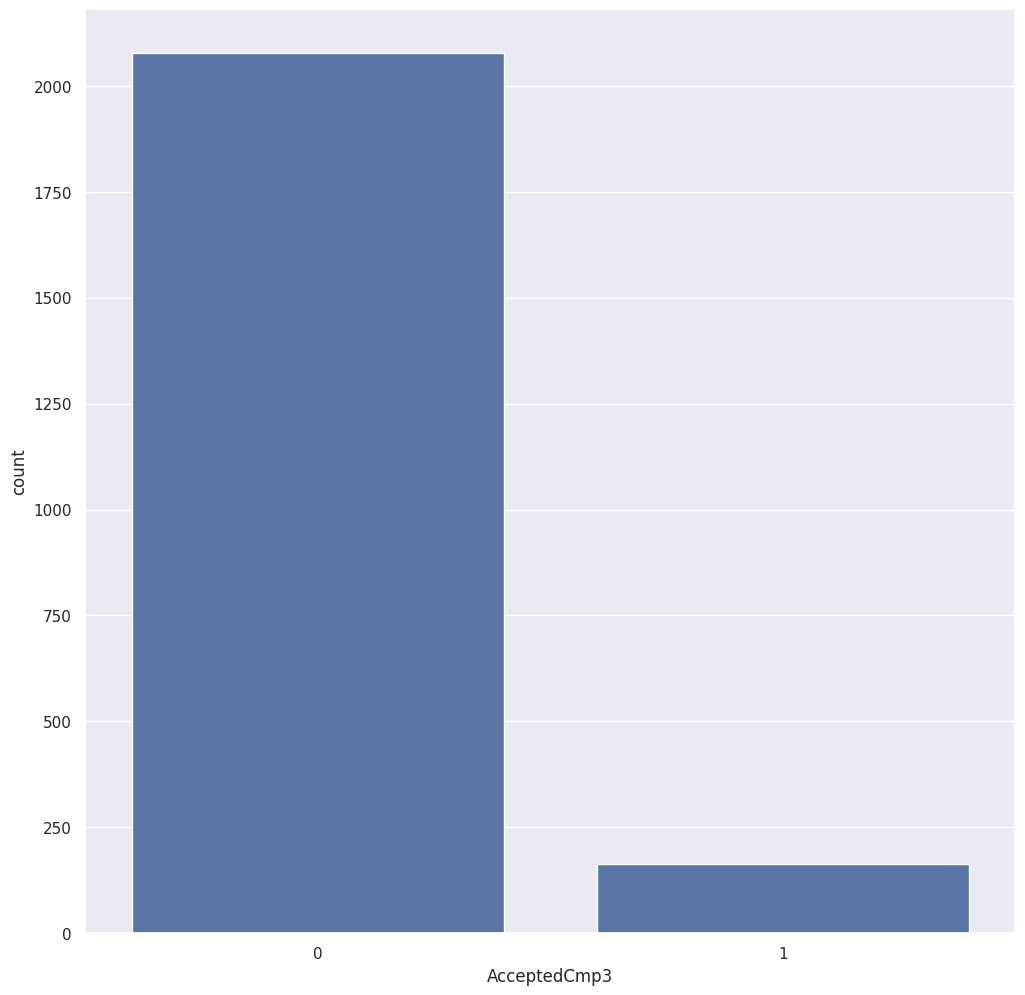

              AcceptedCmp4  Ratio
AcceptedCmp4                     
0                     2073     92
1                      167      7
##########################################


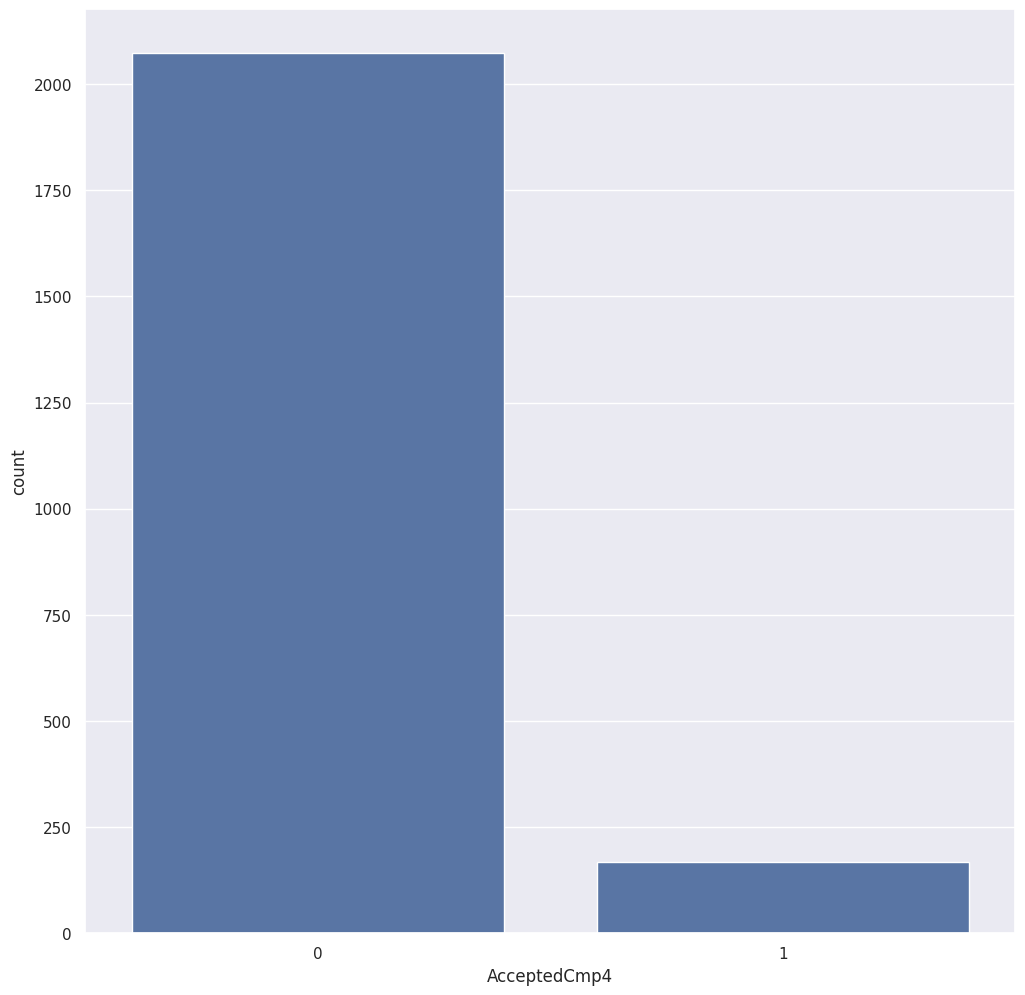

              AcceptedCmp5  Ratio
AcceptedCmp5                     
0                     2077     92
1                      163      7
##########################################


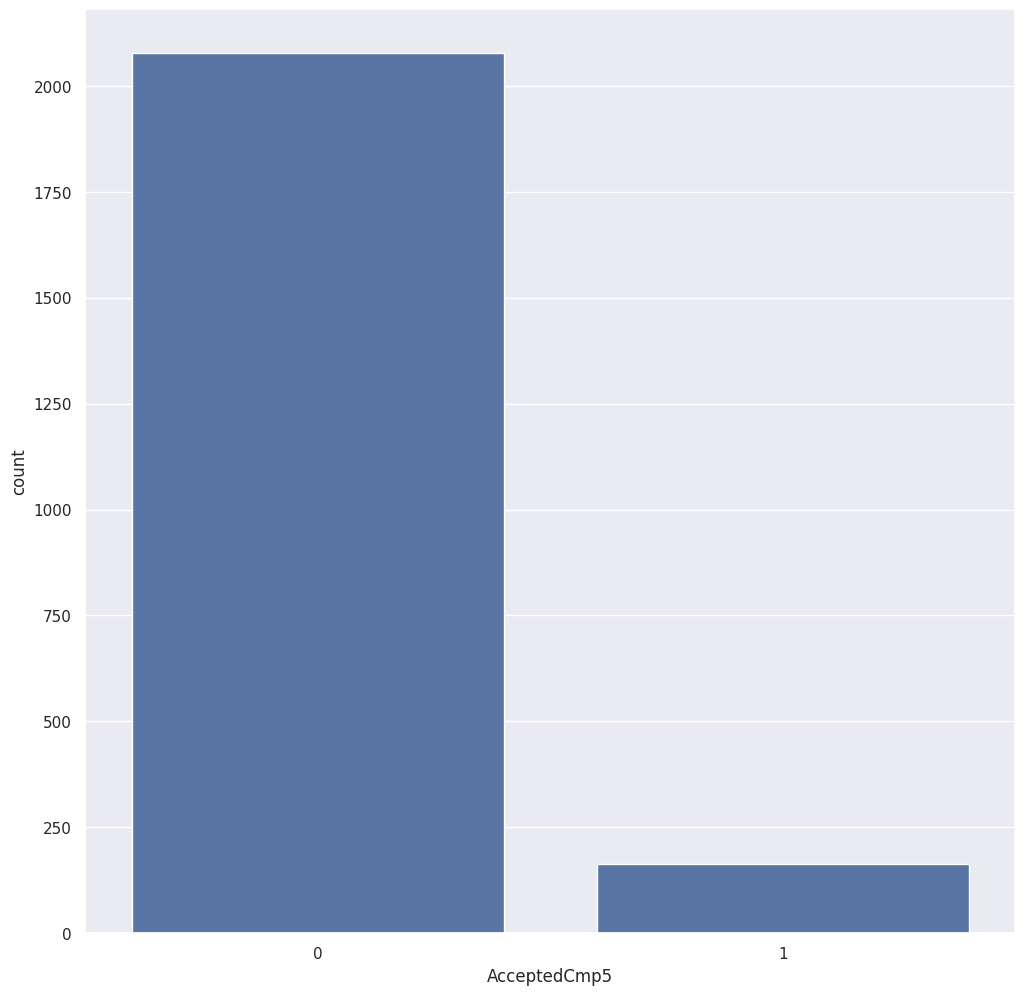

              AcceptedCmp1  Ratio
AcceptedCmp1                     
0                     2096     93
1                      144      6
##########################################


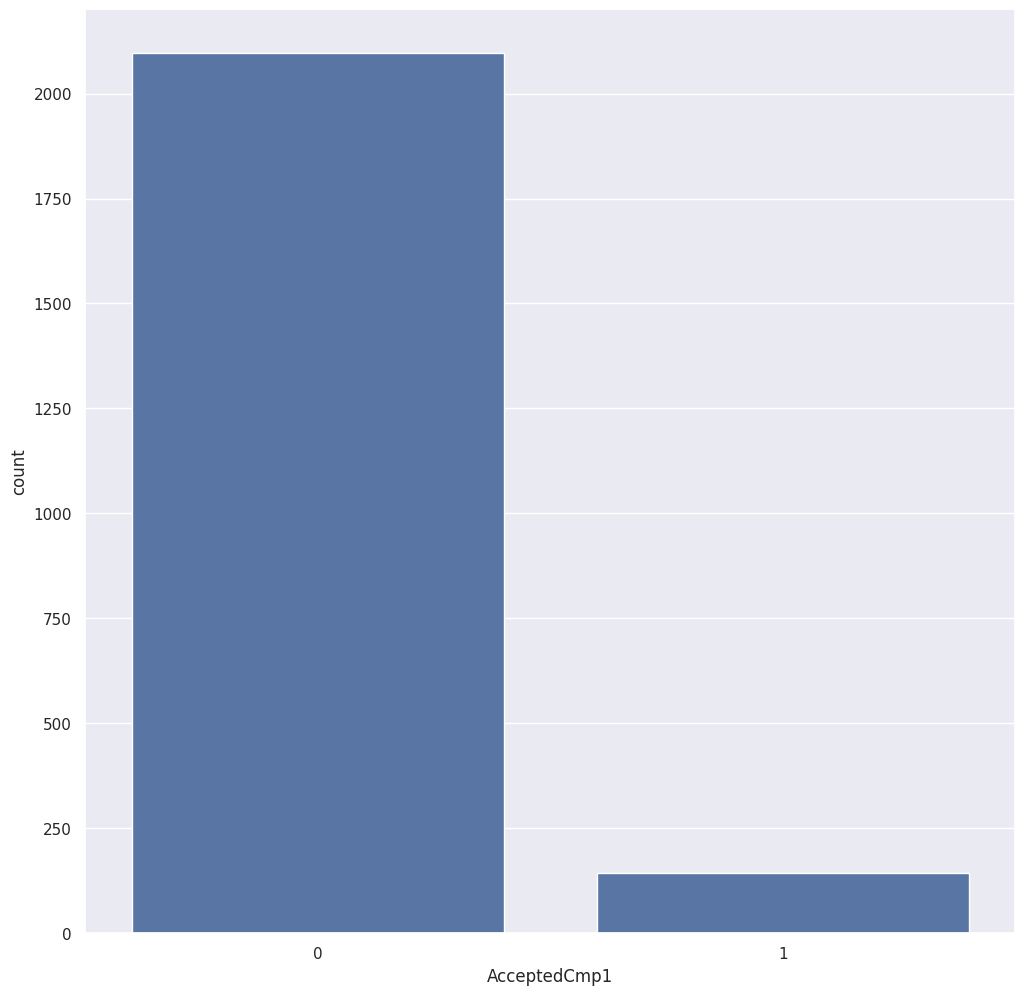

              AcceptedCmp2  Ratio
AcceptedCmp2                     
0                     2210     98
1                       30      1
##########################################


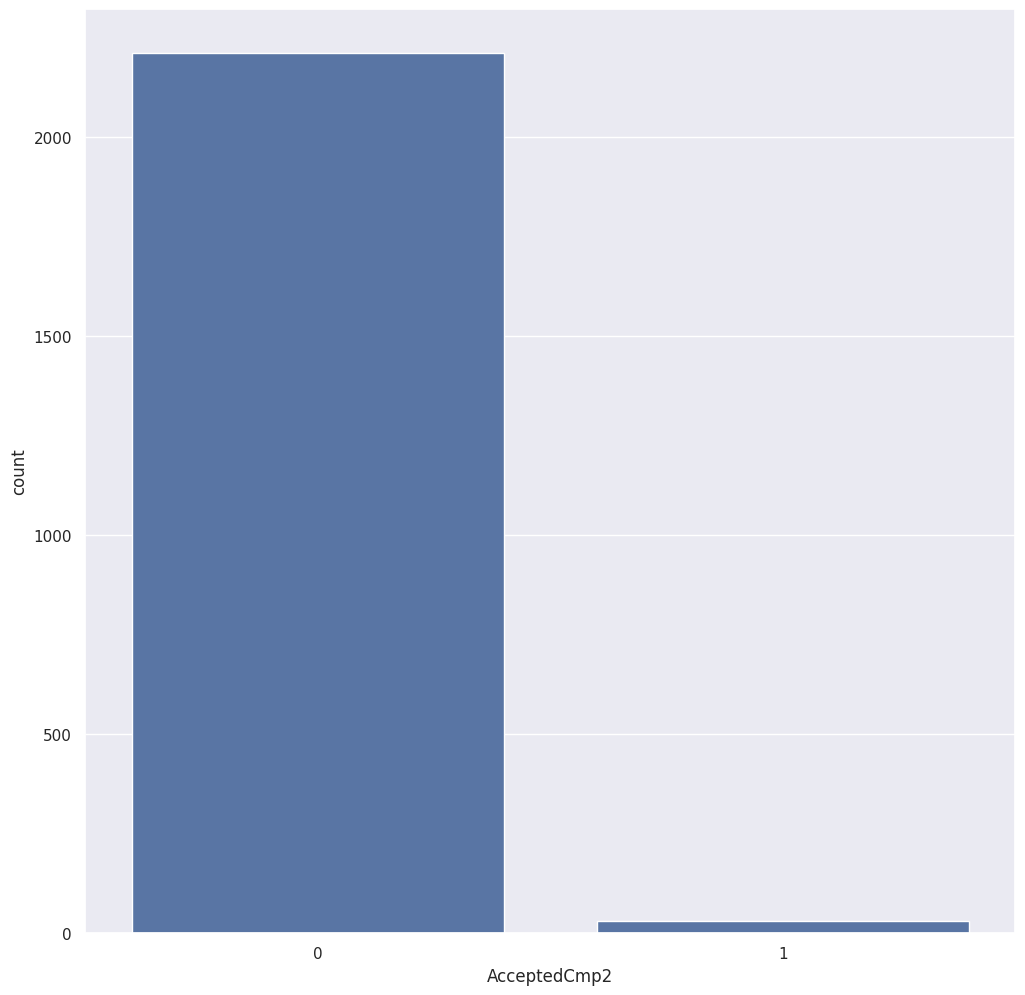

          Complain  Ratio
Complain                 
0             2219     99
1               21      0
##########################################


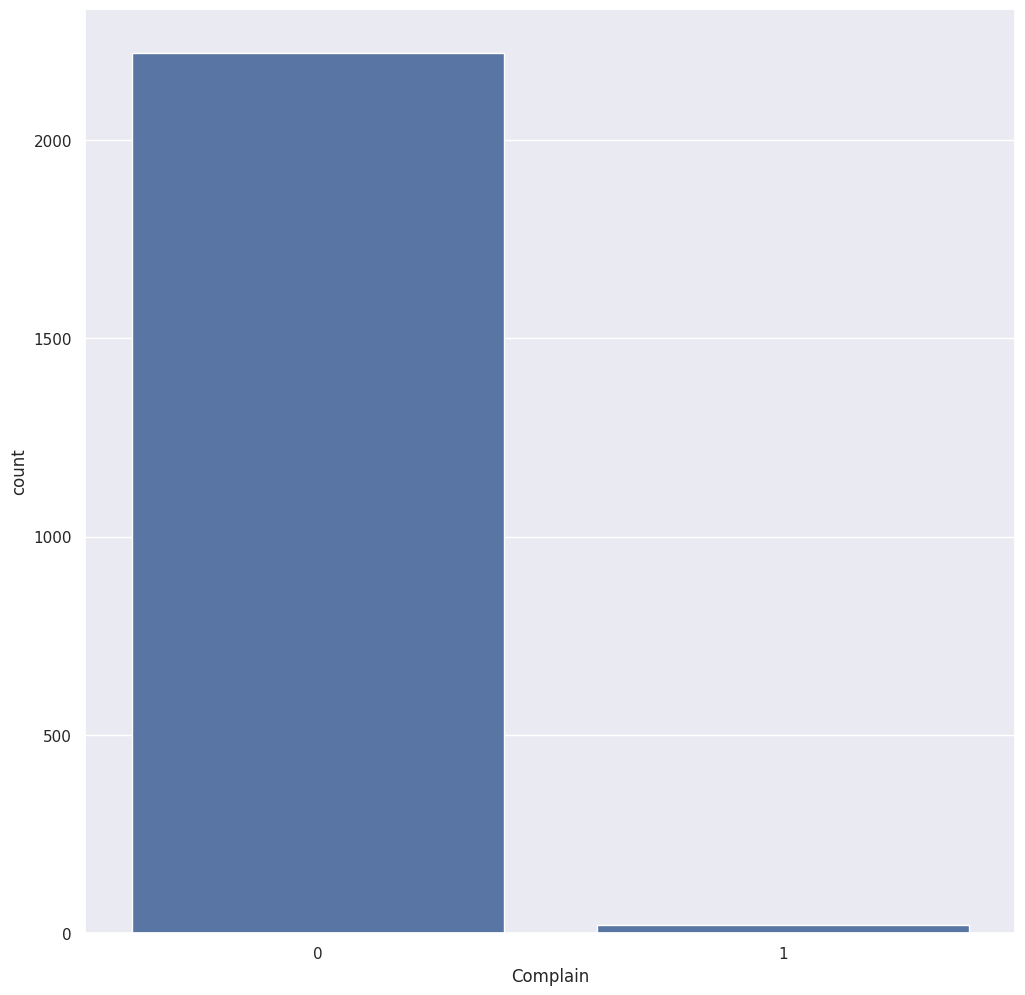

               Z_CostContact  Ratio
Z_CostContact                      
3                       2240    100
##########################################


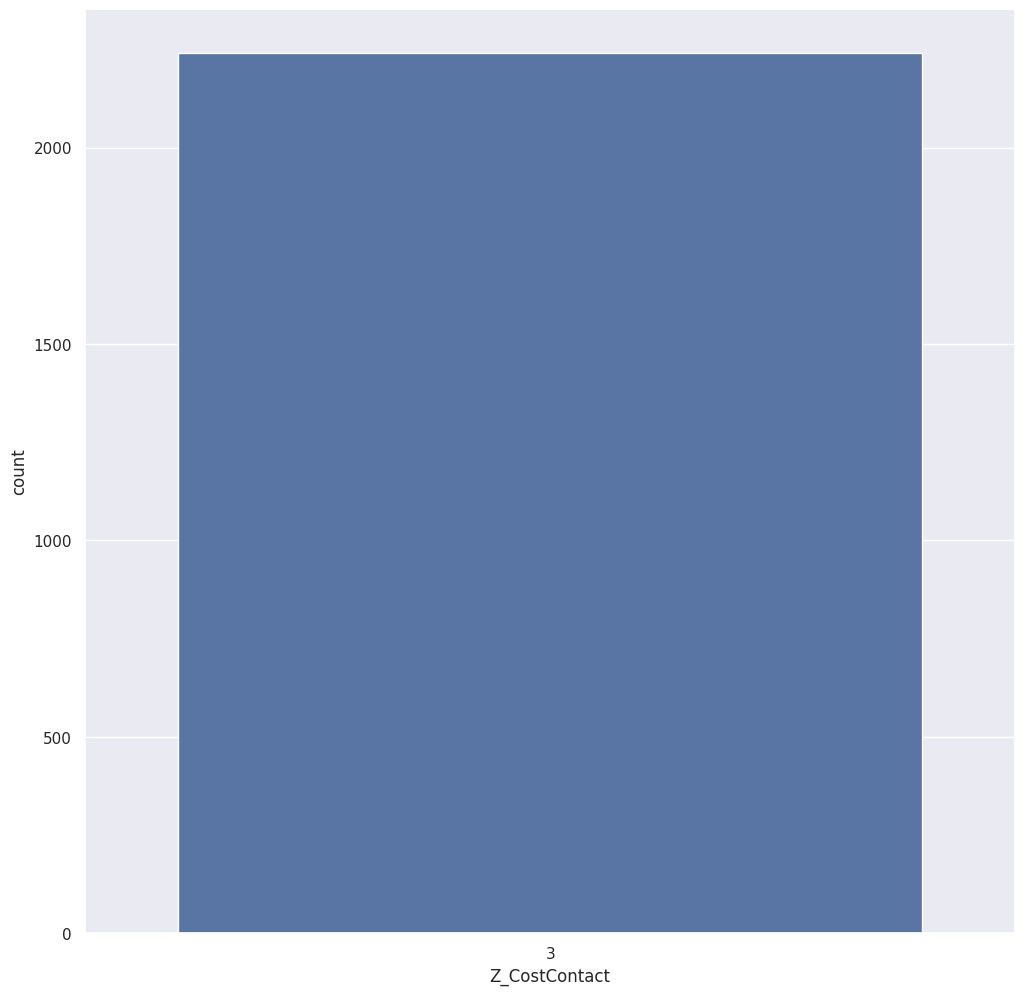

           Z_Revenue  Ratio
Z_Revenue                  
11              2240    100
##########################################


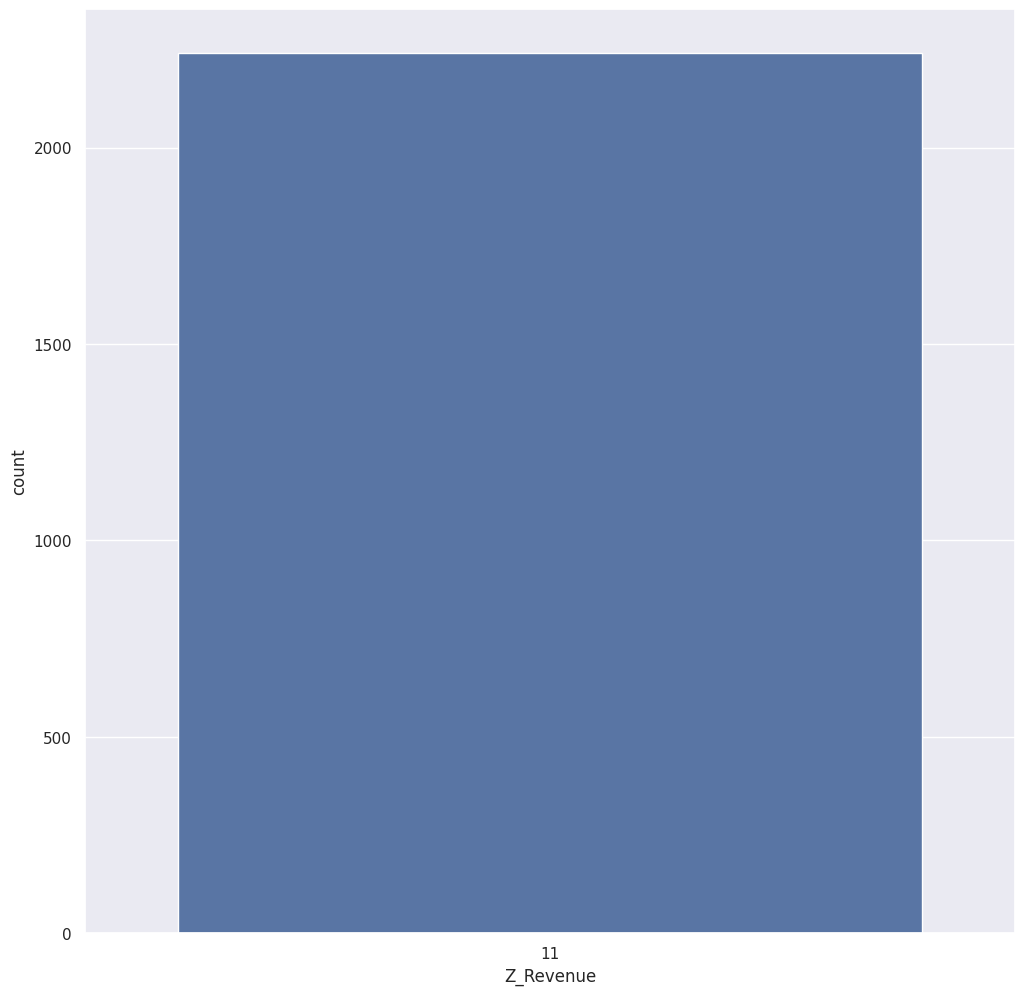

          Response  Ratio
Response                 
0             1906     85
1              334     14
##########################################


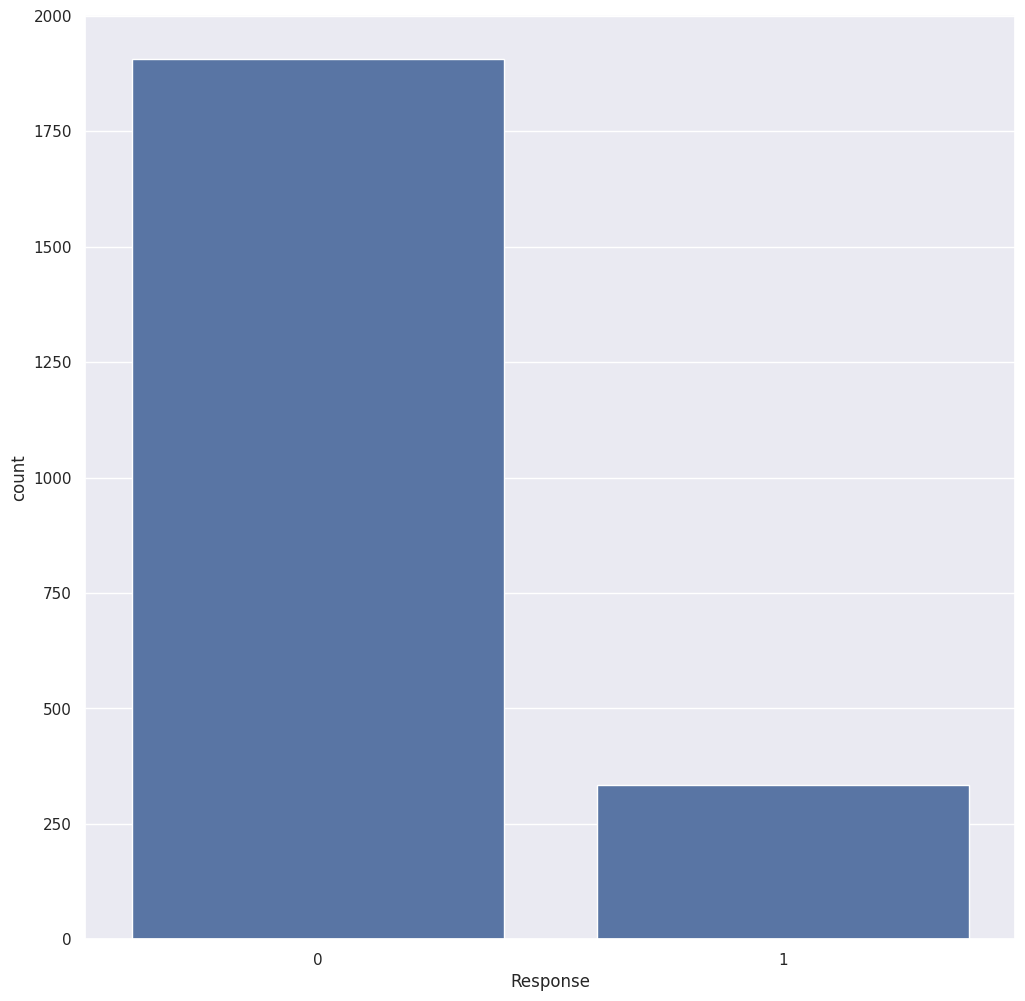

In [114]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() // len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    if df[col].dtypes == "bool":
        print("sdfsdfsdfsdfsdfsd")
    else:
        cat_summary(df, col, plot=True)


            Education  Ratio
Education                   
Graduation       1127     50
PhD               486     21
Master            370     16
2n Cycle          203      9
Basic              54      2
##########################################


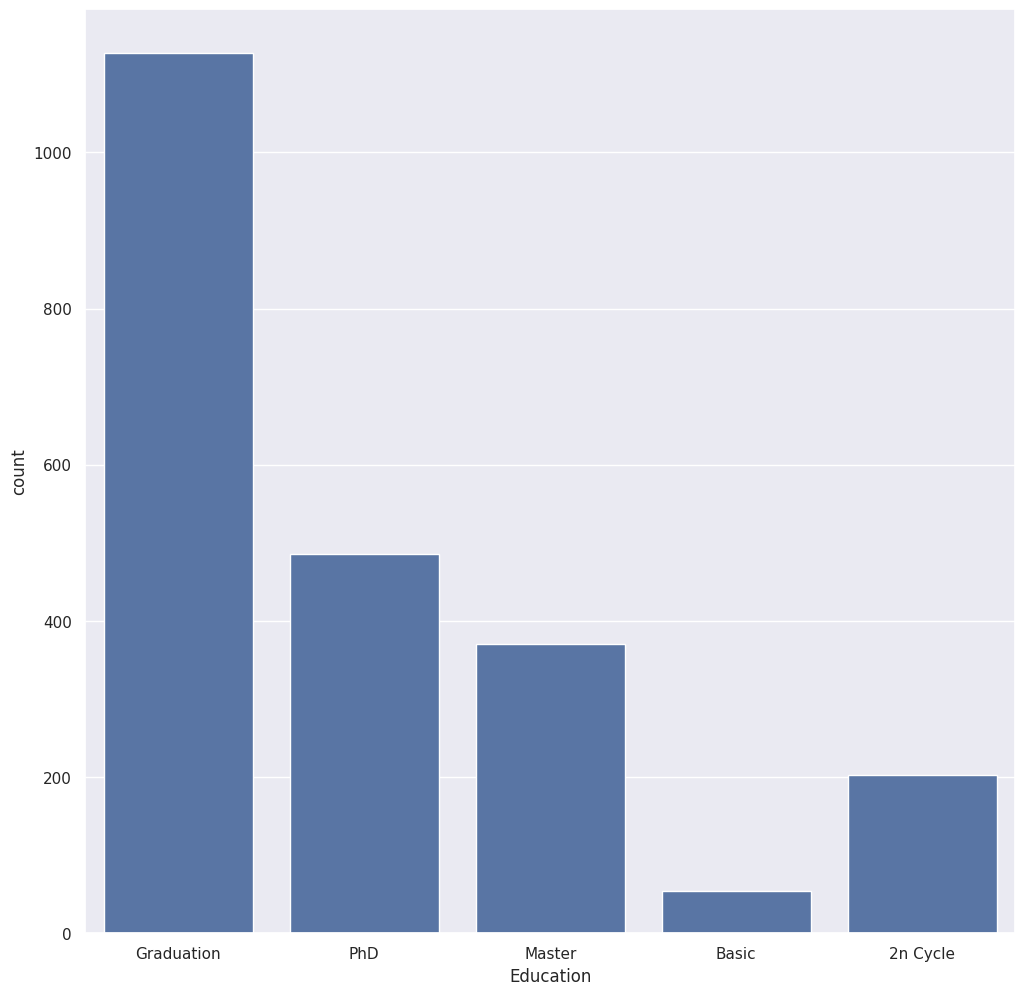

                Marital_Status  Ratio
Marital_Status                       
Married                    864     38
Together                   580     25
Single                     480     21
Divorced                   232     10
Widow                       77      3
Alone                        3      0
Absurd                       2      0
YOLO                         2      0
##########################################


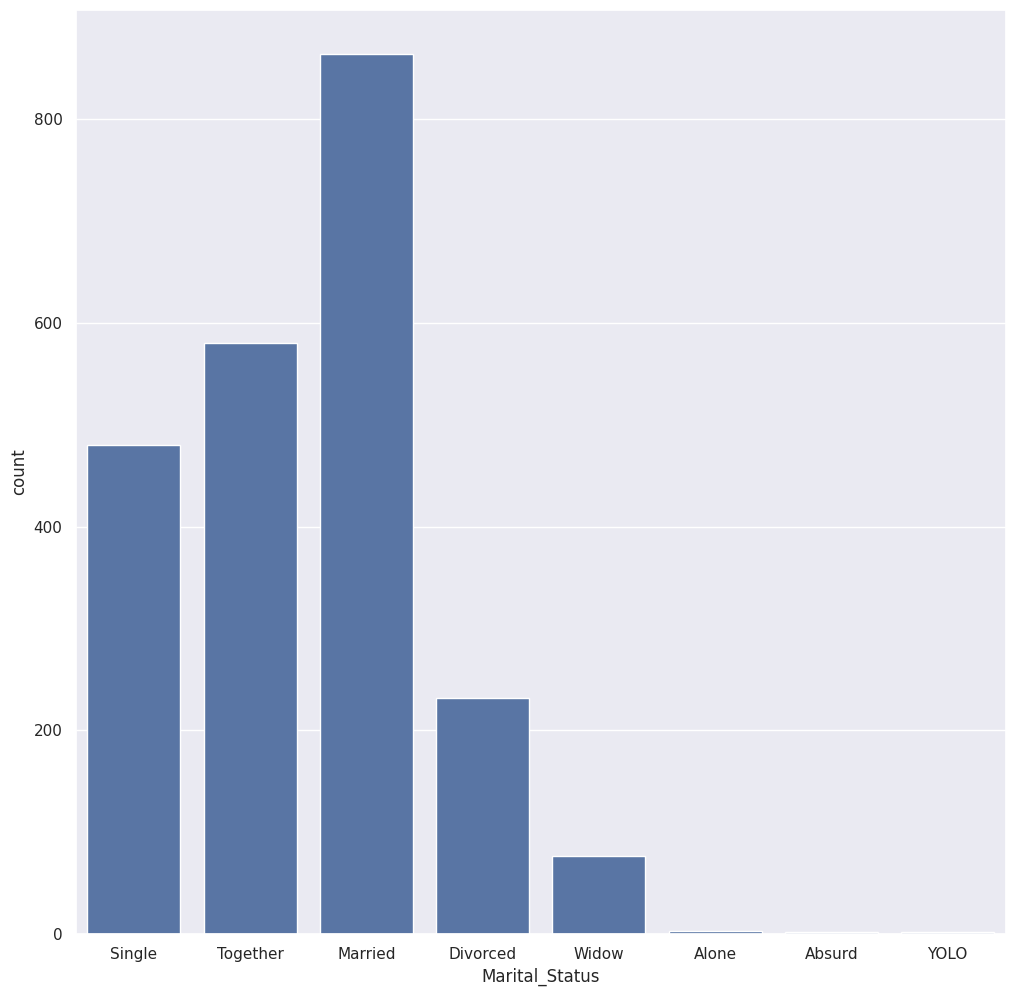

         Kidhome  Ratio
Kidhome                
0           1293     57
1            899     40
2             48      2
##########################################


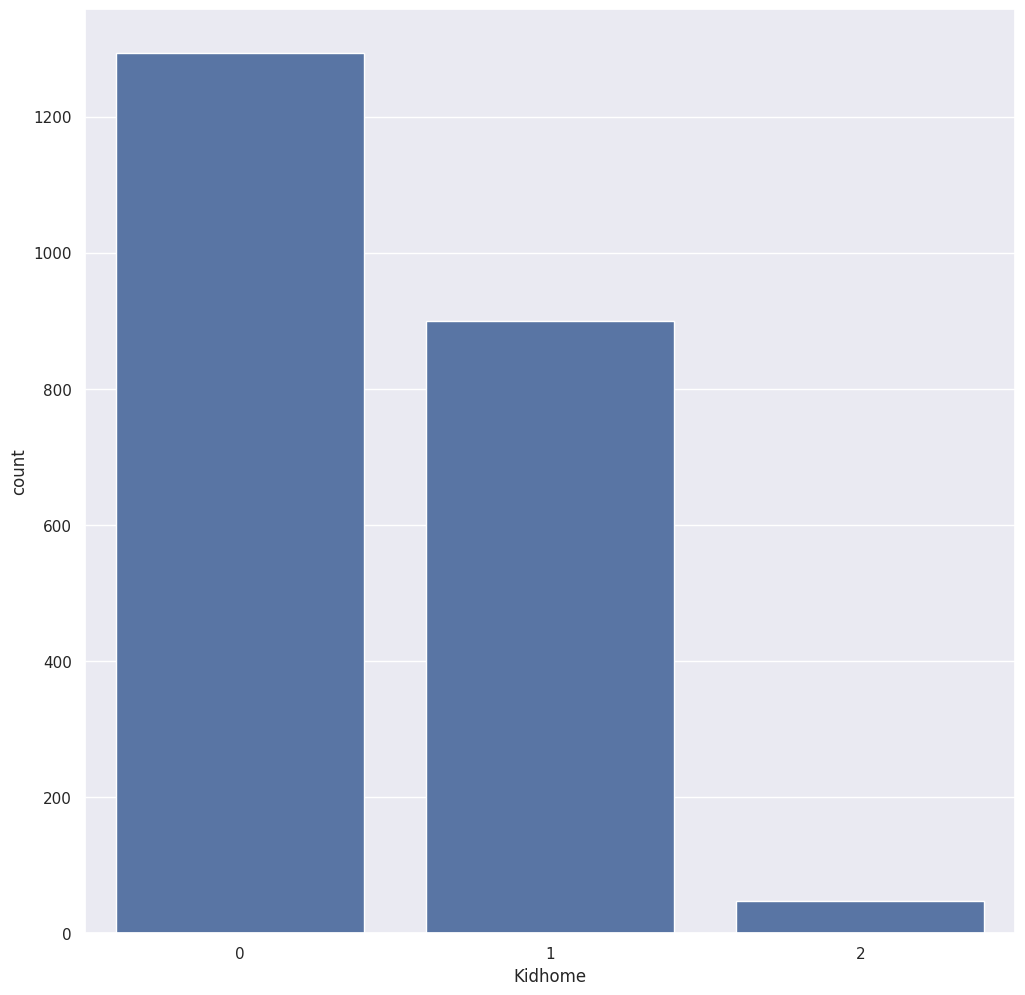

          Teenhome  Ratio
Teenhome                 
0             1158     51
1             1030     45
2               52      2
##########################################


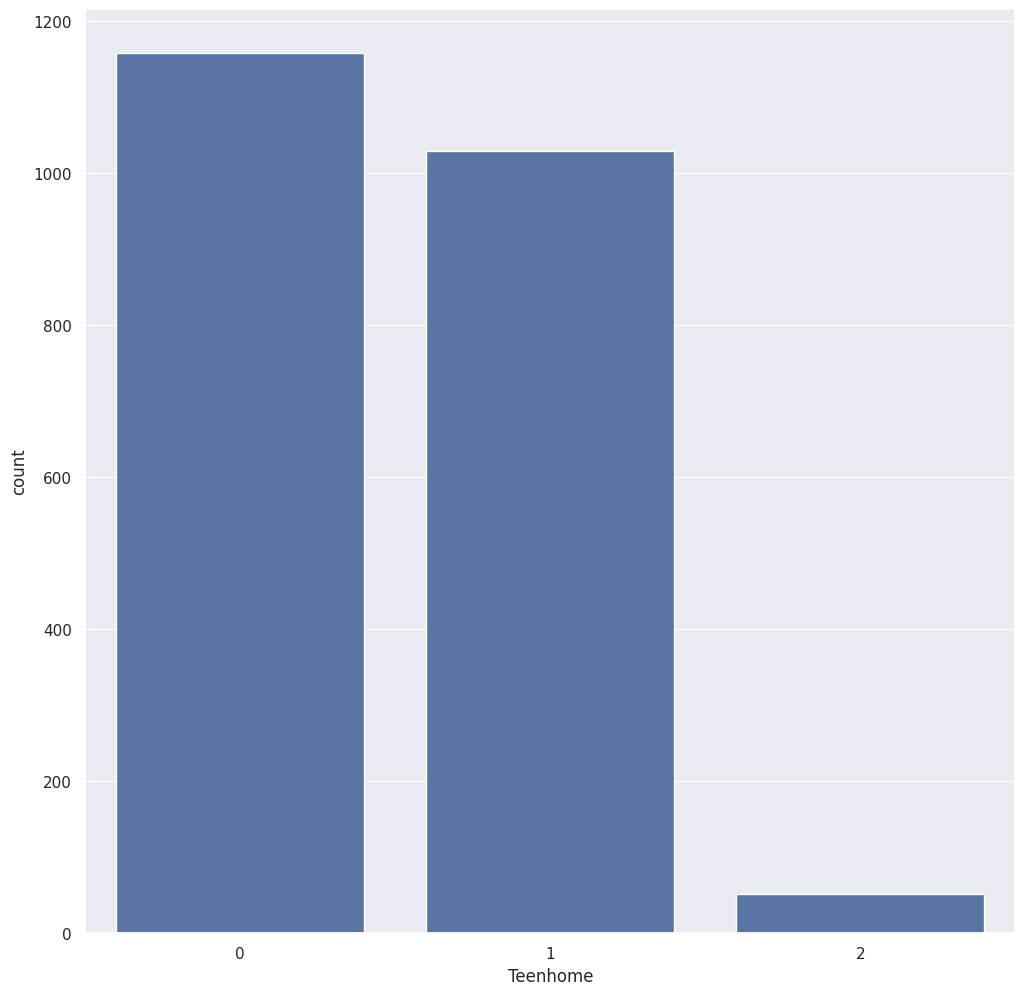

              AcceptedCmp3  Ratio
AcceptedCmp3                     
0                     2077     92
1                      163      7
##########################################


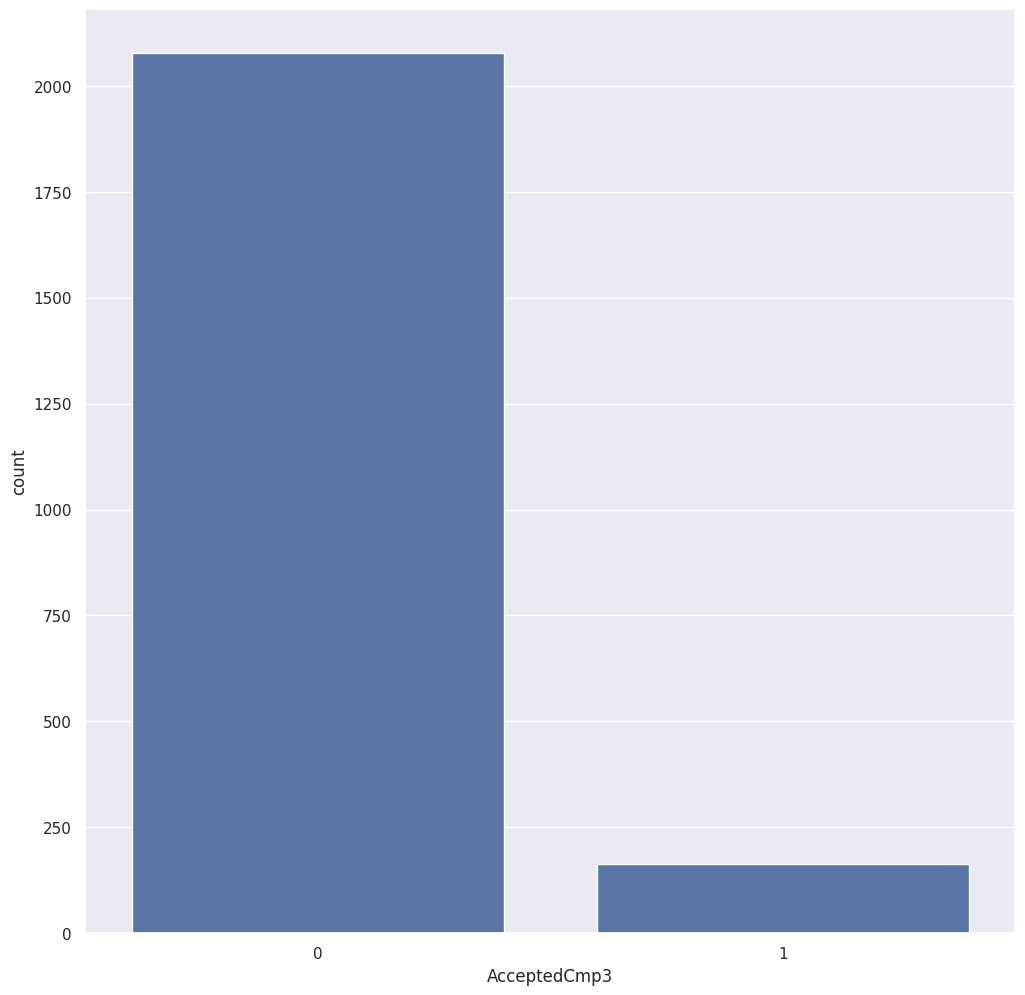

              AcceptedCmp4  Ratio
AcceptedCmp4                     
0                     2073     92
1                      167      7
##########################################


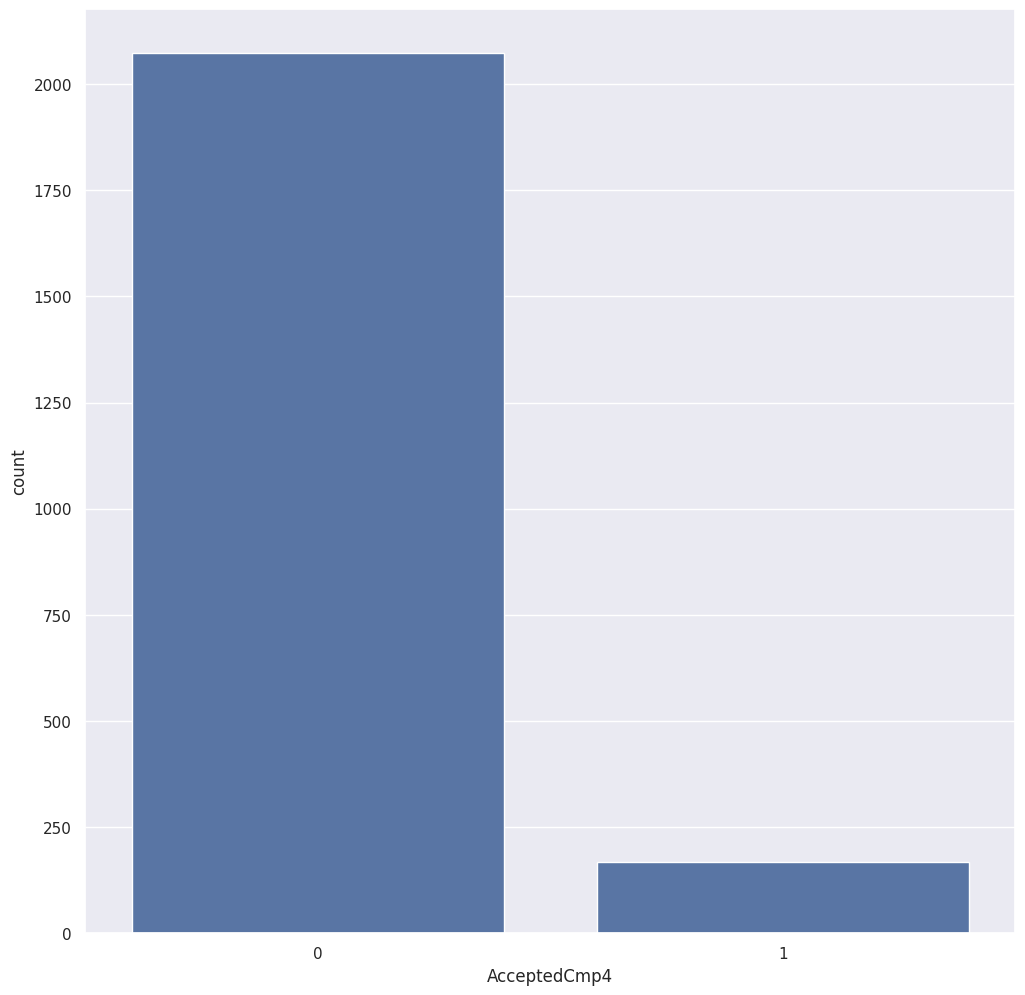

              AcceptedCmp5  Ratio
AcceptedCmp5                     
0                     2077     92
1                      163      7
##########################################


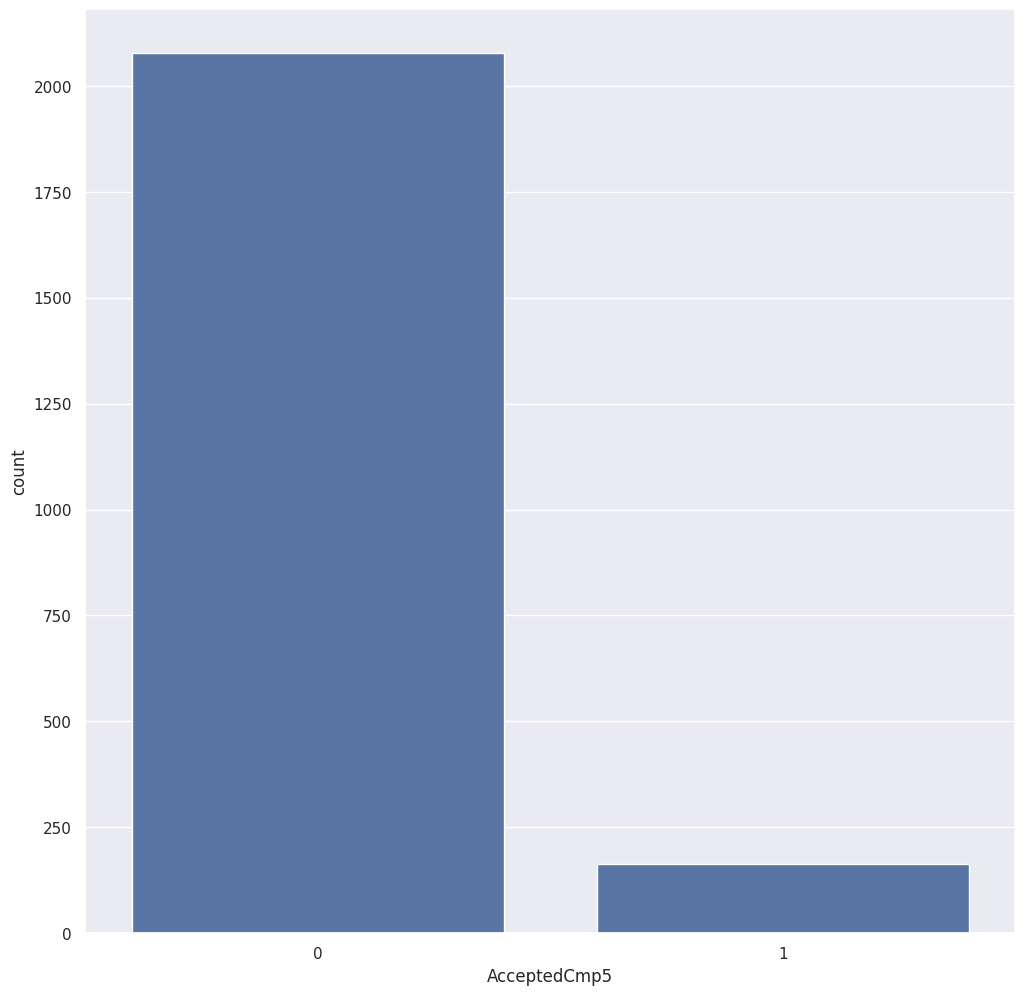

              AcceptedCmp1  Ratio
AcceptedCmp1                     
0                     2096     93
1                      144      6
##########################################


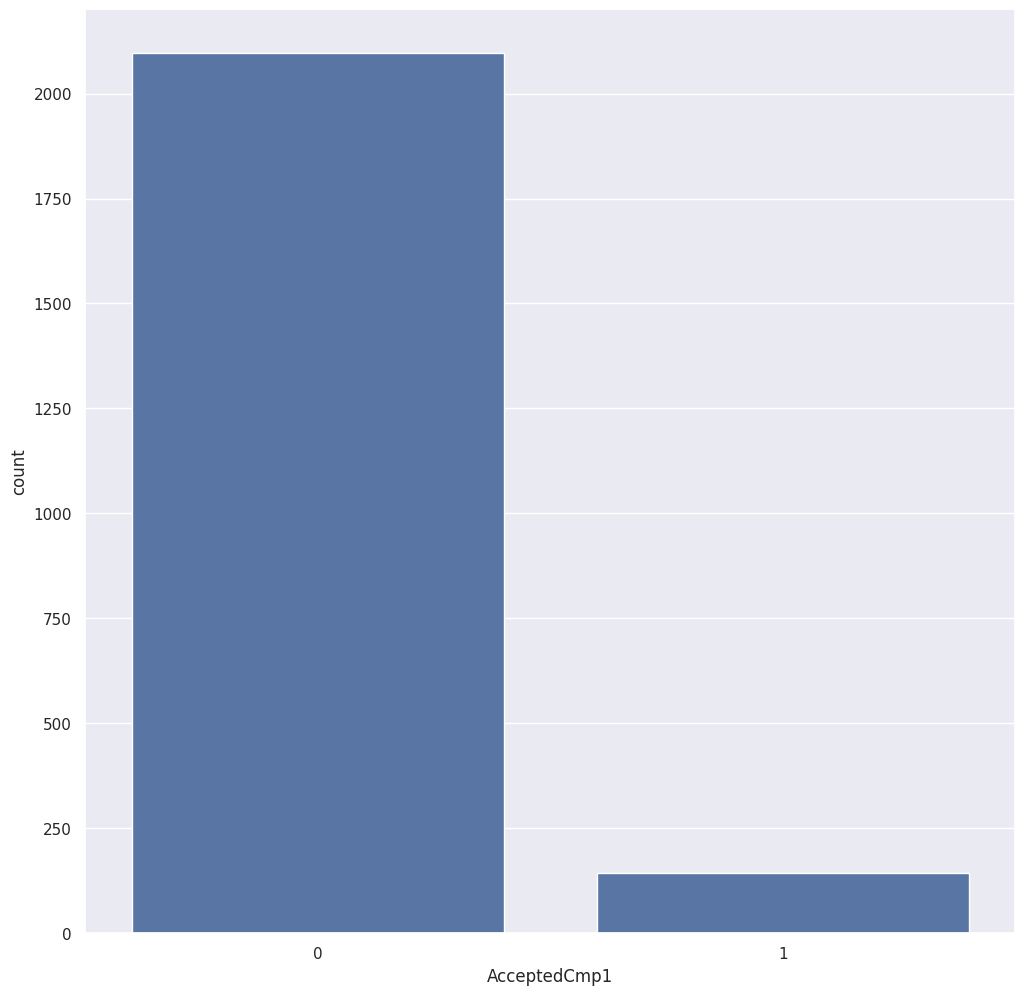

              AcceptedCmp2  Ratio
AcceptedCmp2                     
0                     2210     98
1                       30      1
##########################################


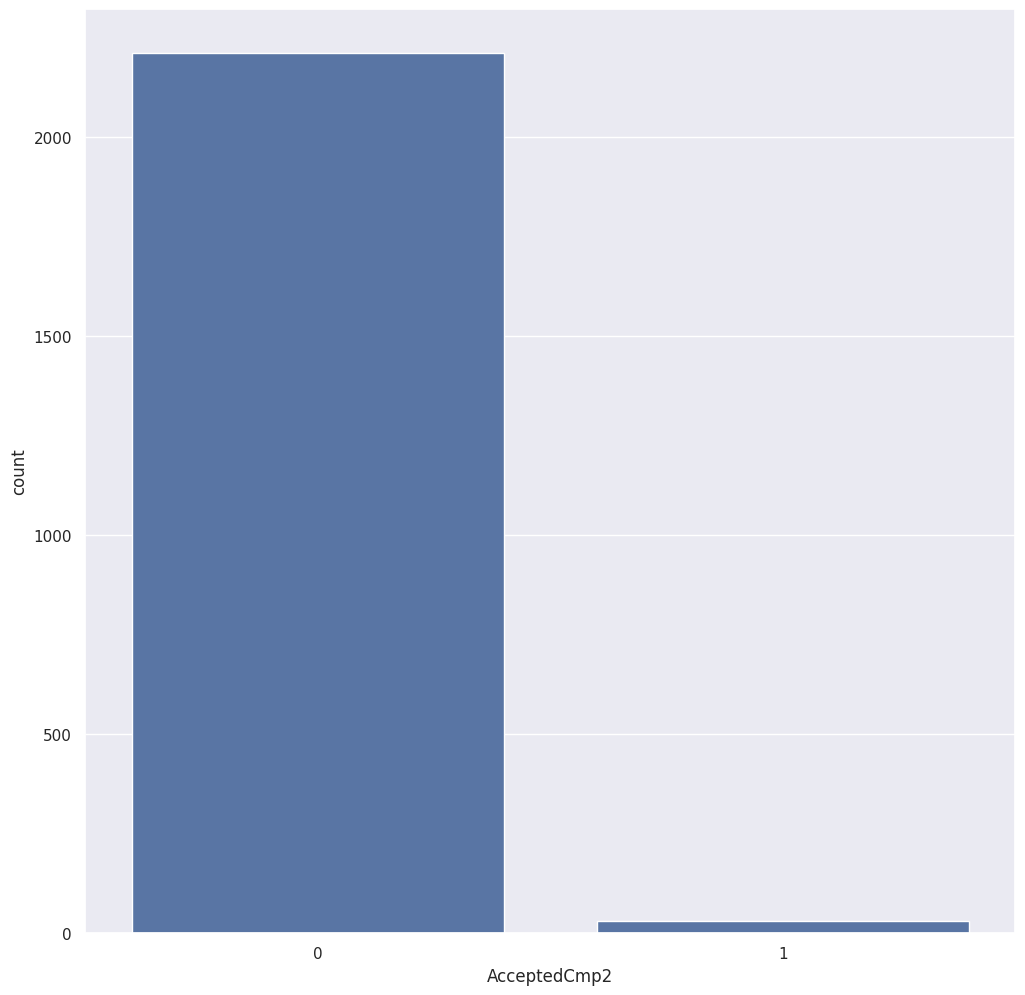

          Complain  Ratio
Complain                 
0             2219     99
1               21      0
##########################################


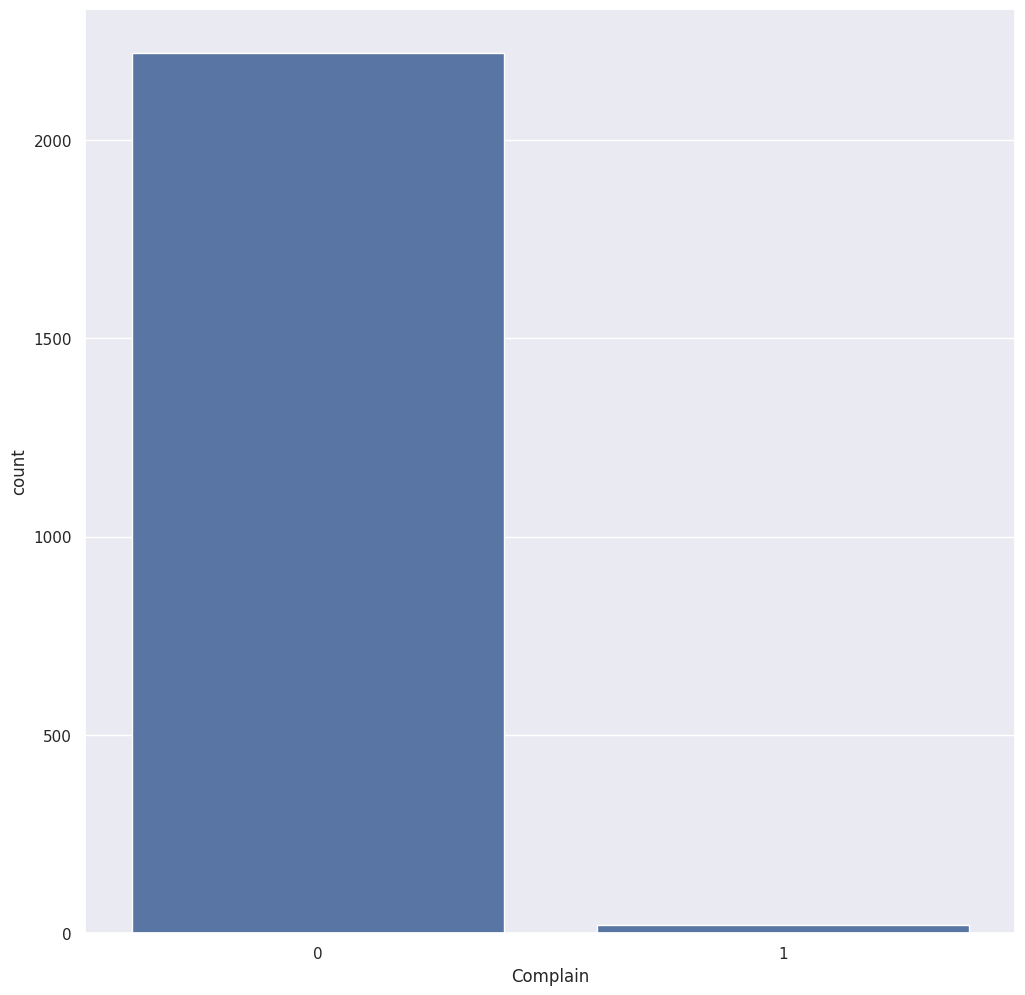

               Z_CostContact  Ratio
Z_CostContact                      
3                       2240    100
##########################################


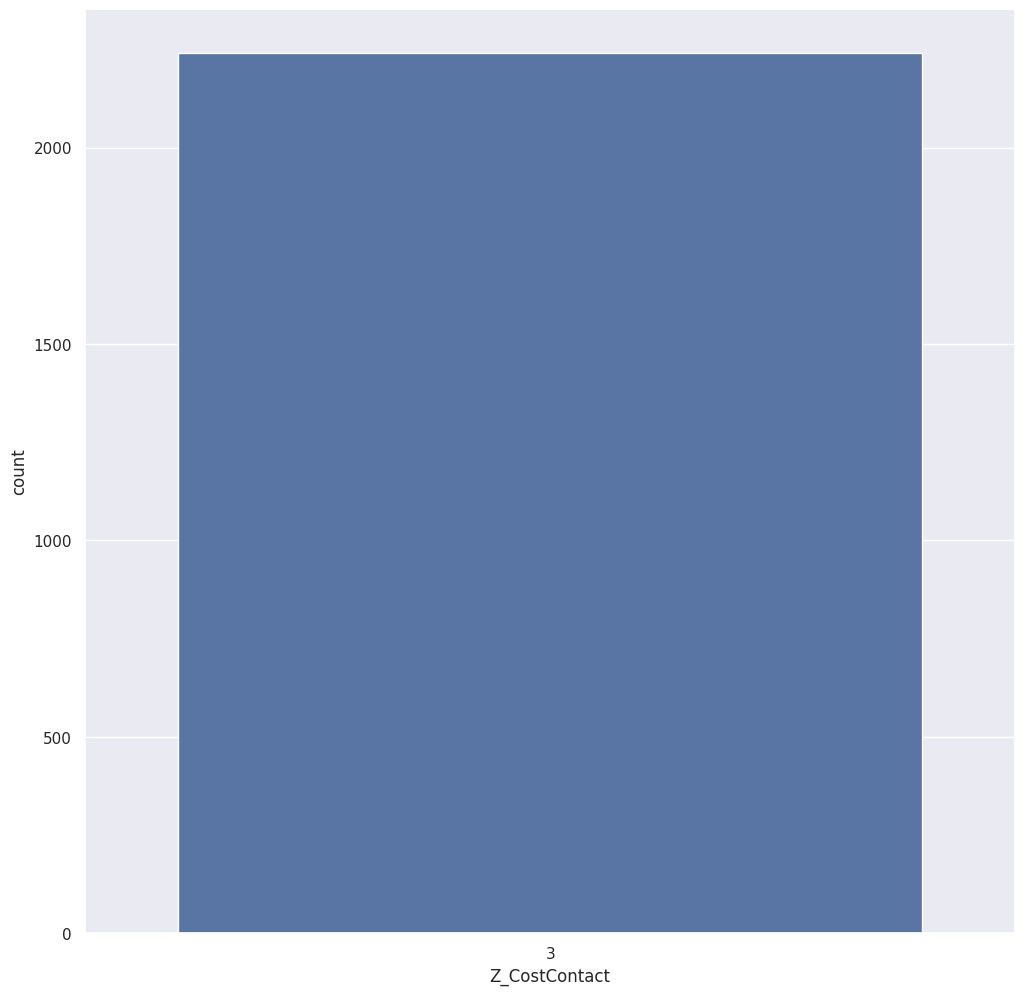

           Z_Revenue  Ratio
Z_Revenue                  
11              2240    100
##########################################


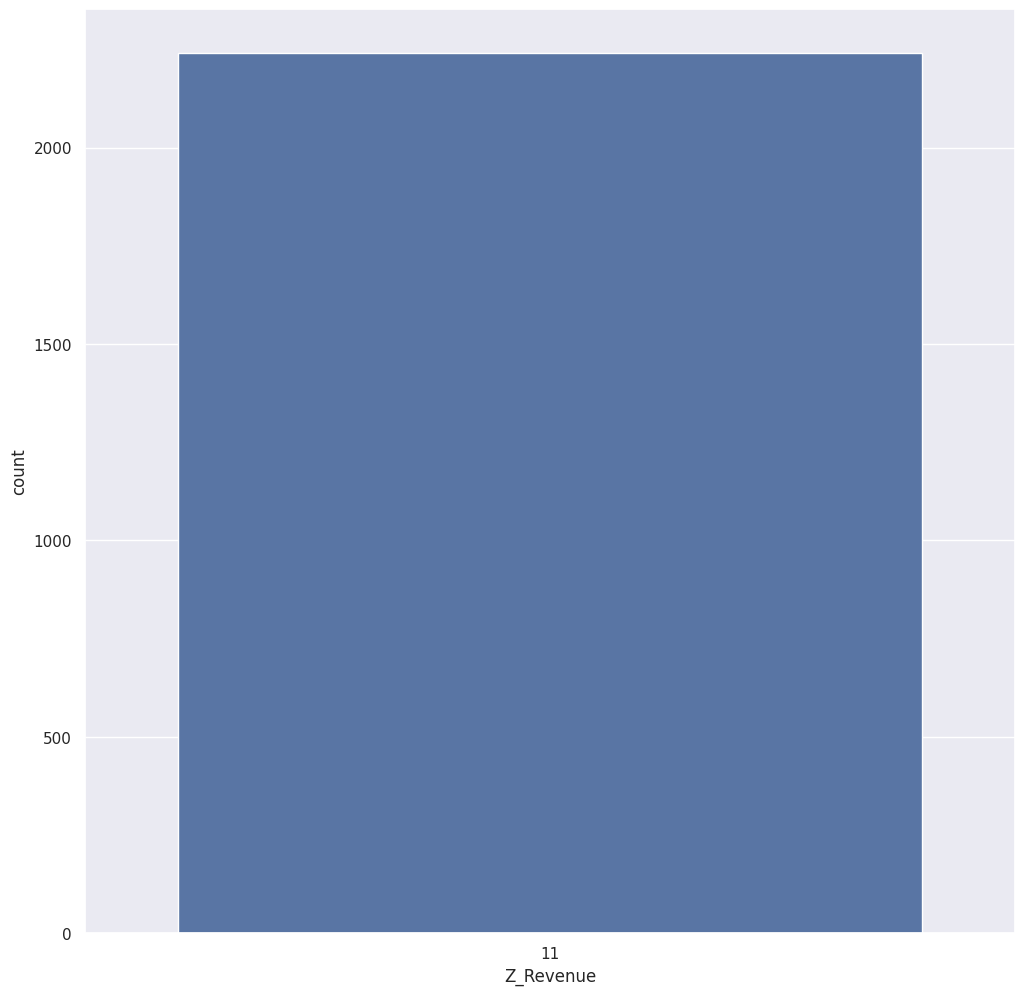

          Response  Ratio
Response                 
0             1906     85
1              334     14
##########################################


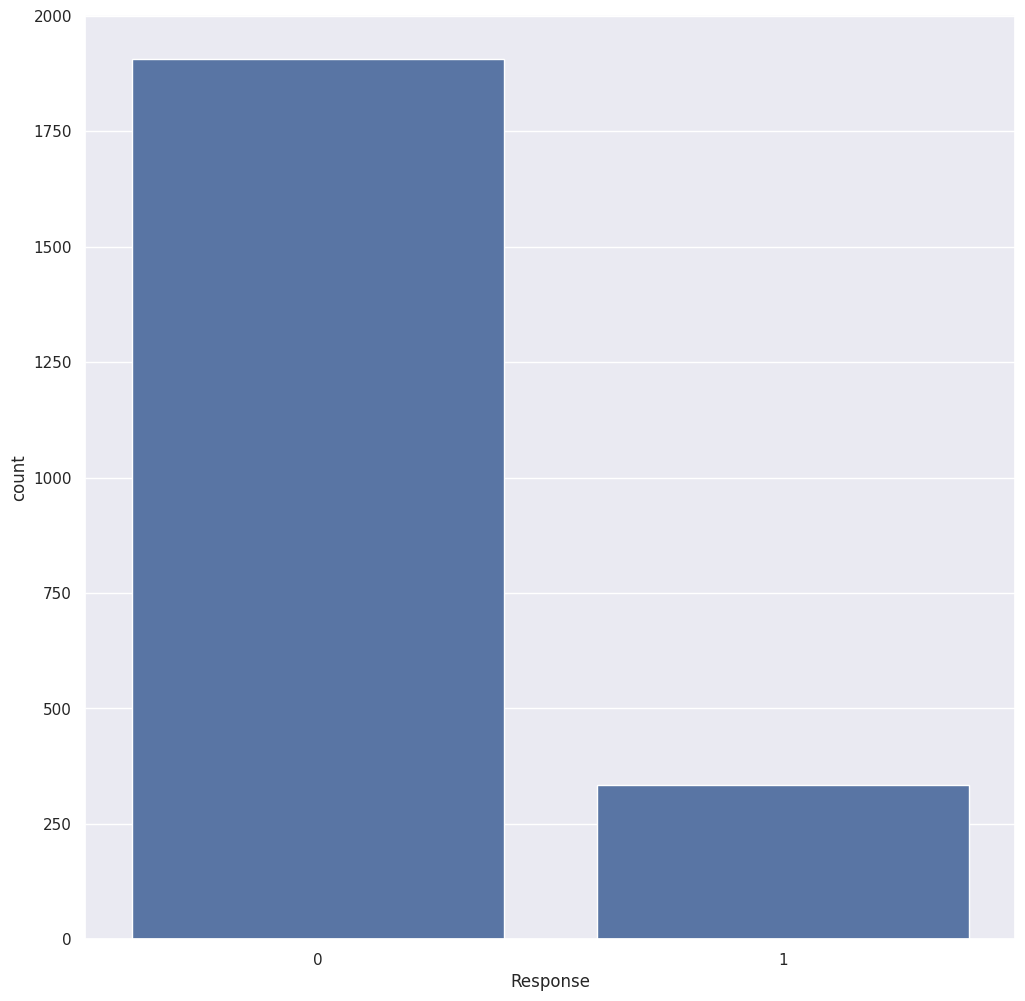

In [115]:
def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() // len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() // len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)

for col in cat_cols:
  cat_summary(df, col, plot=True)


count     2240.000000
mean      5592.159821
std       3246.662198
min          0.000000
5%         576.850000
10%       1126.100000
20%       2284.200000
30%       3384.500000
40%       4438.800000
50%       5458.500000
60%       6570.800000
70%       7786.300000
80%       9059.200000
90%      10203.400000
95%      10675.050000
99%      11074.610000
max      11191.000000
Name: ID, dtype: float64


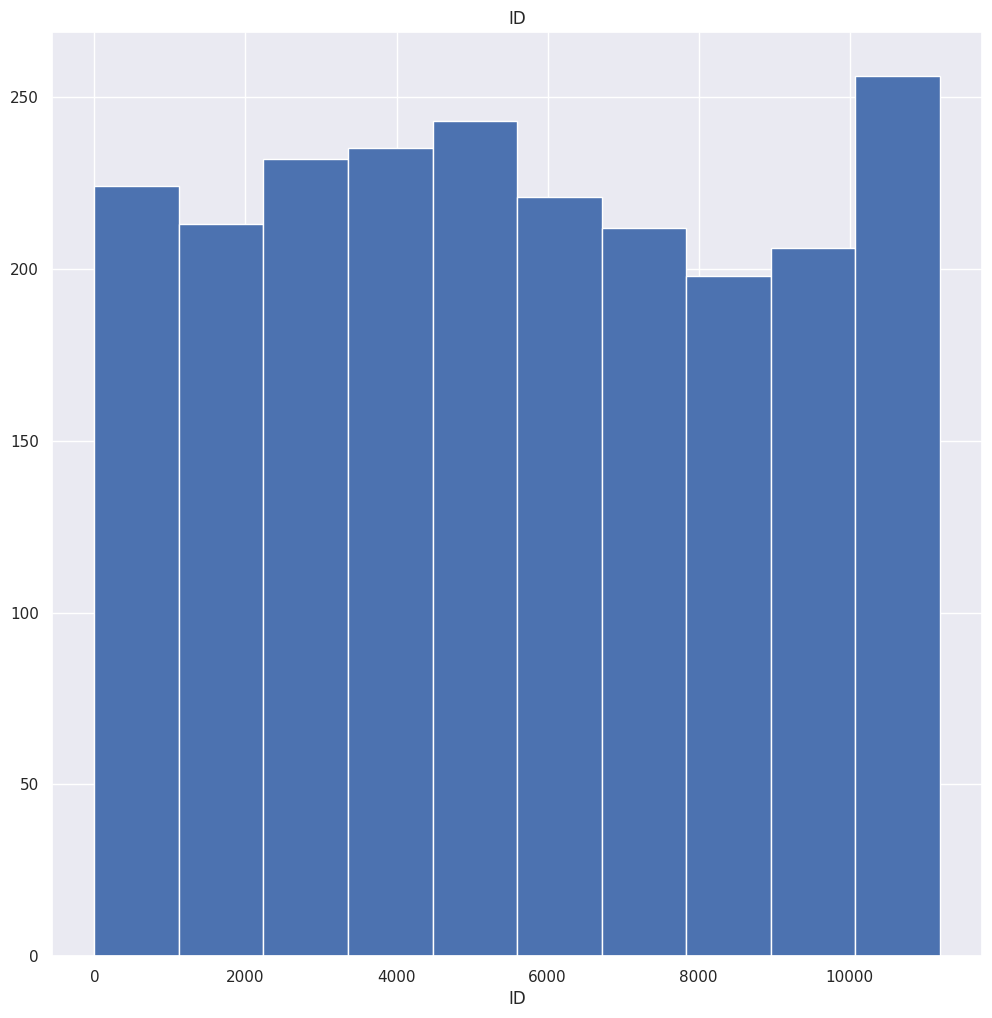

count      2240.000000
mean      52168.895536
std       25096.624385
min        1730.000000
5%        18975.550000
10%       24067.500000
20%       32037.400000
30%       38222.700000
40%       44542.200000
50%       51301.000000
60%       58316.800000
70%       65154.300000
80%       71634.800000
90%       79800.300000
95%       83927.000000
99%       94437.680000
max      666666.000000
Name: Income, dtype: float64


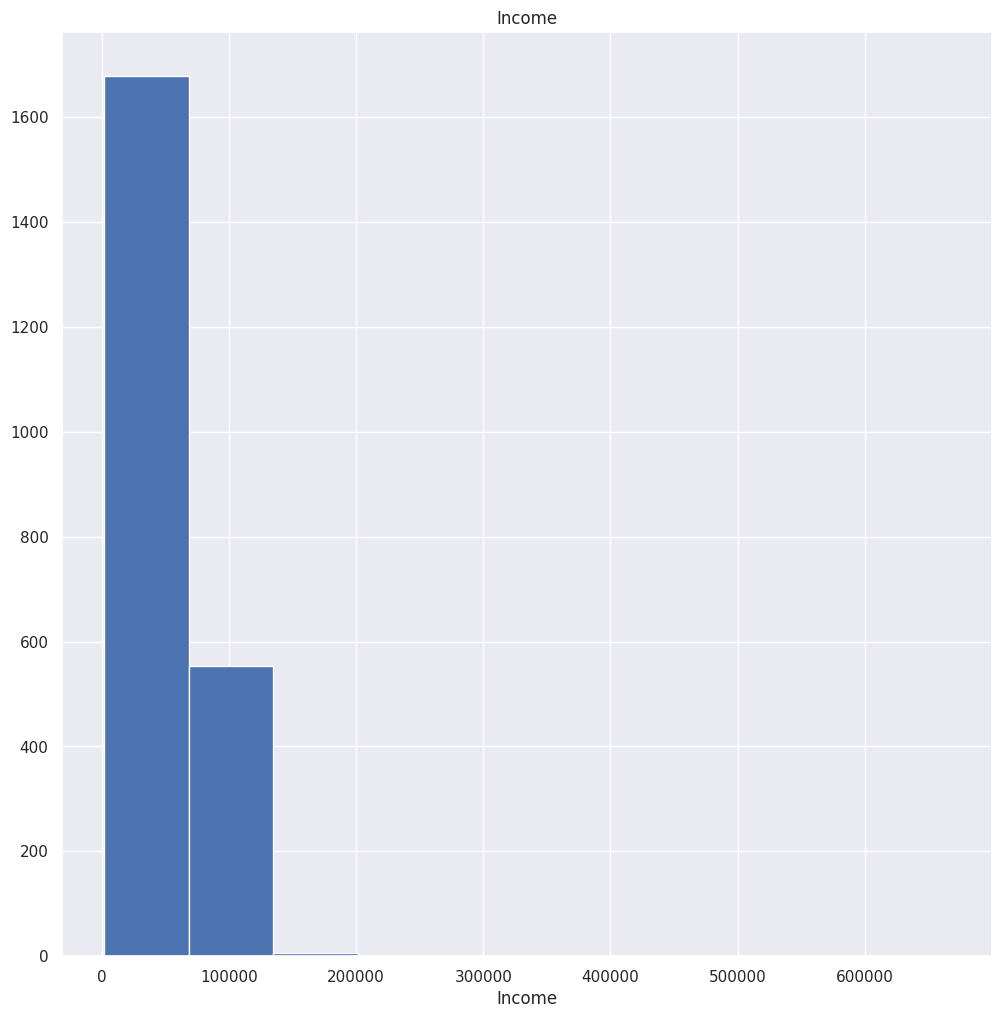

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
5%          4.000000
10%         9.000000
20%        19.000000
30%        29.000000
40%        39.000000
50%        49.000000
60%        59.000000
70%        69.000000
80%        79.000000
90%        89.000000
95%        94.000000
99%        98.000000
max        99.000000
Name: Recency, dtype: float64


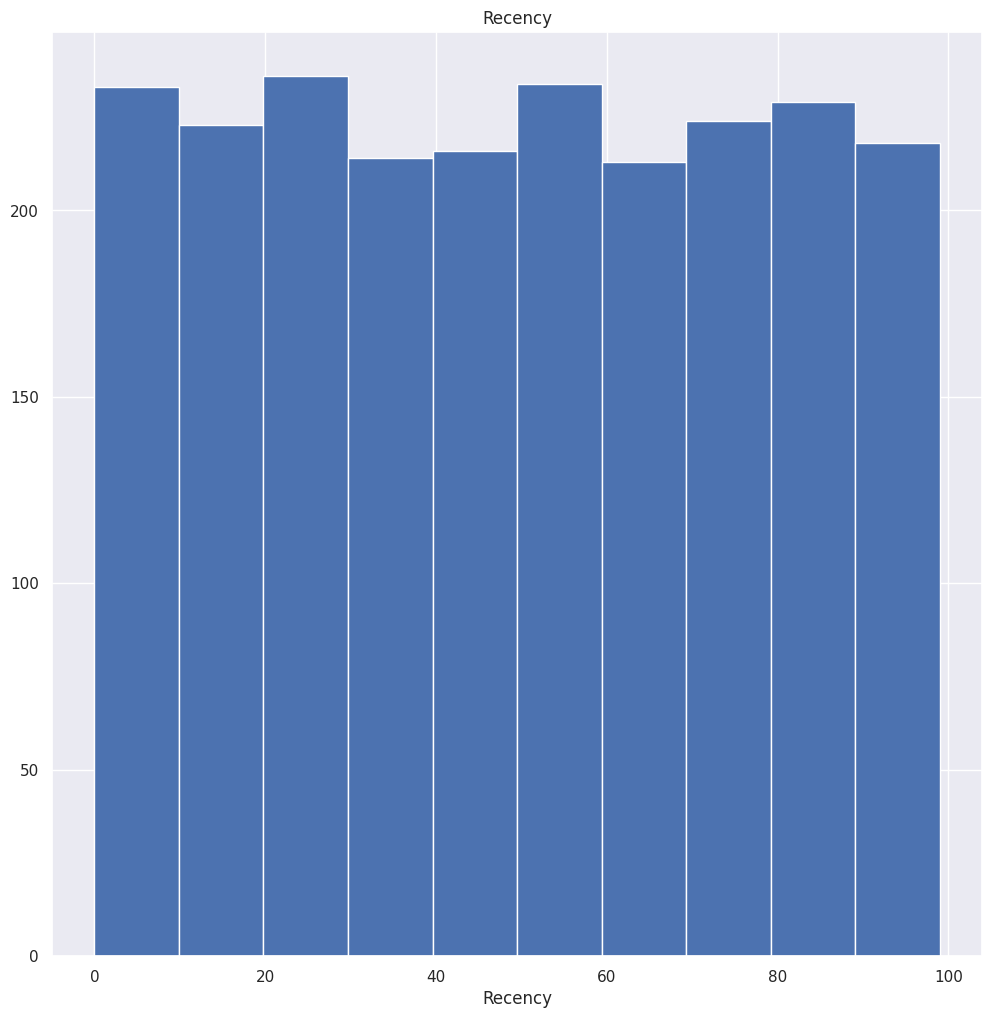

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
5%          3.000000
10%         6.000000
20%        16.000000
30%        34.000000
40%        81.000000
50%       173.500000
60%       284.400000
70%       418.600000
80%       581.200000
90%       822.100000
95%      1000.000000
99%      1285.000000
max      1493.000000
Name: MntWines, dtype: float64


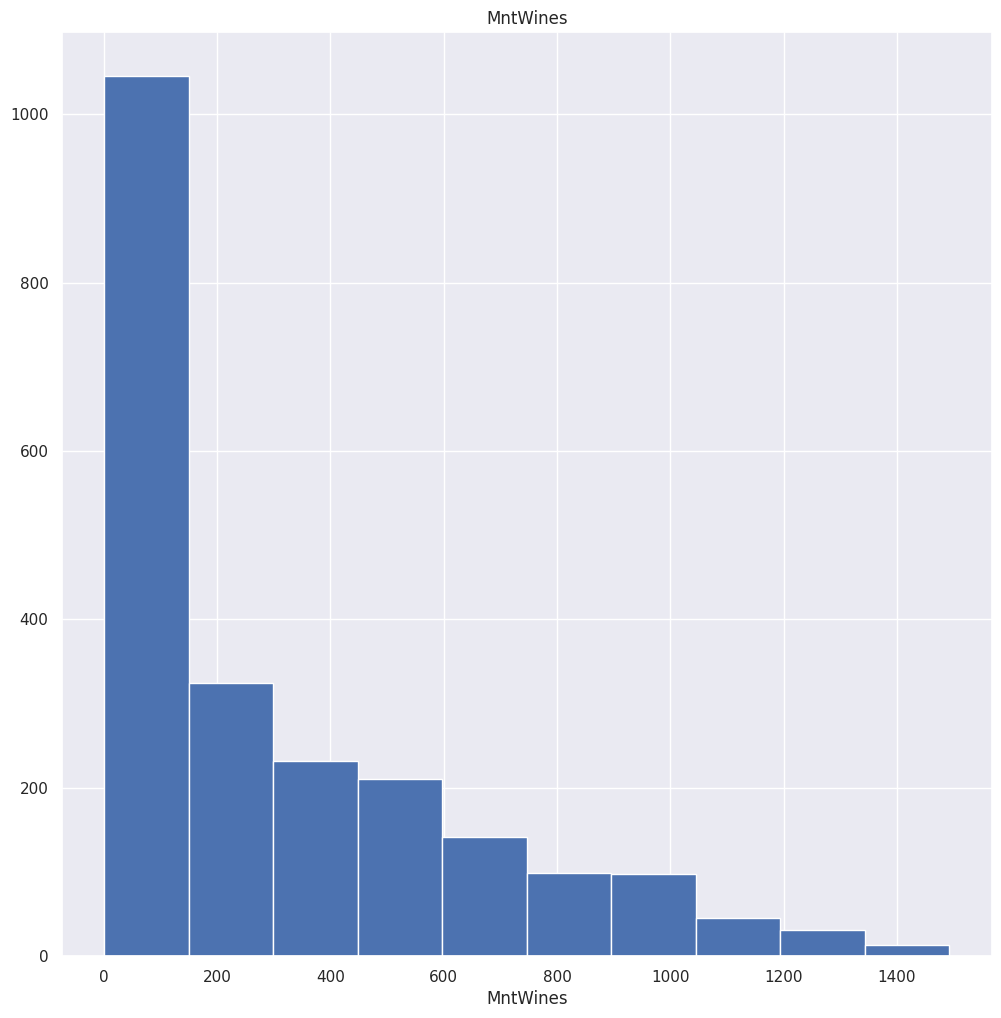

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
5%          0.000000
10%         0.000000
20%         1.000000
30%         2.000000
40%         4.000000
50%         8.000000
60%        15.000000
70%        25.000000
80%        44.000000
90%        83.000000
95%       123.000000
99%       172.000000
max       199.000000
Name: MntFruits, dtype: float64


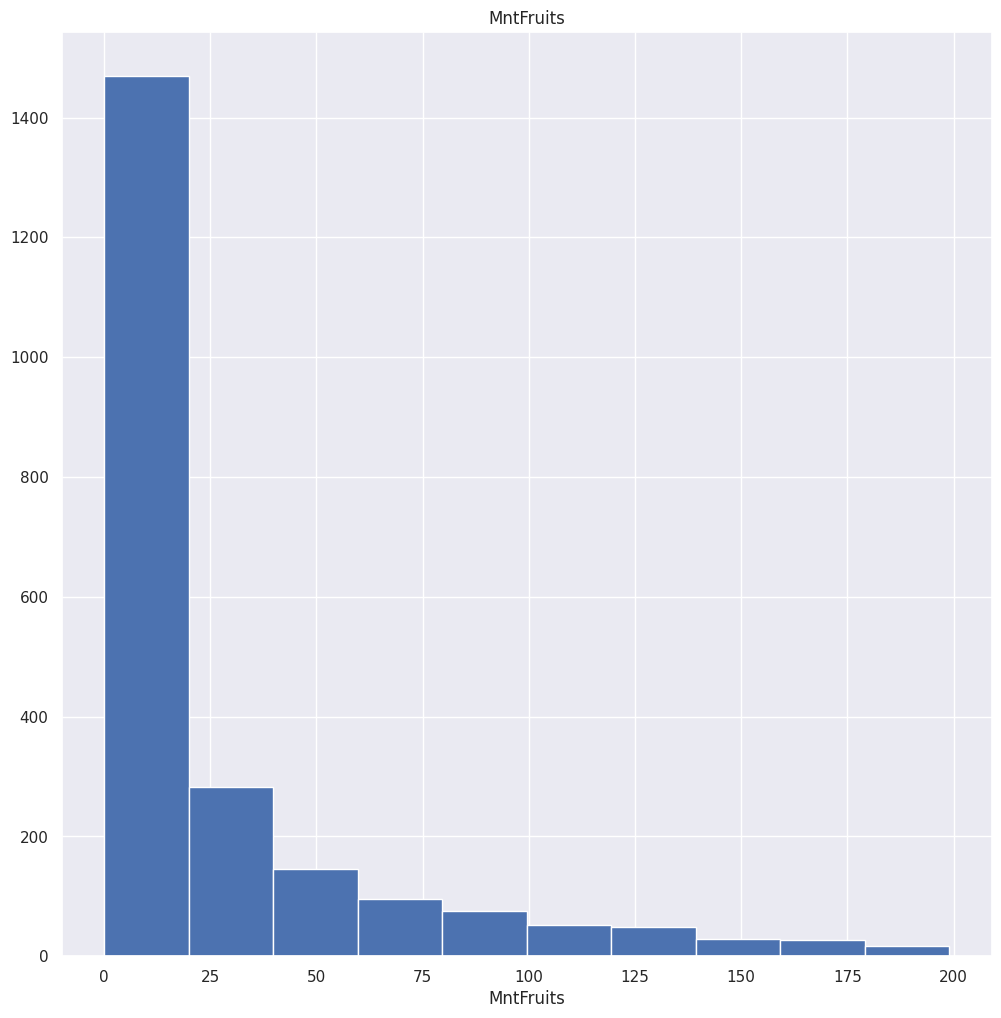

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
5%          4.000000
10%         7.000000
20%        12.000000
30%        20.000000
40%        35.000000
50%        67.000000
60%       108.400000
70%       177.000000
80%       298.400000
90%       499.000000
95%       687.100000
99%       915.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64


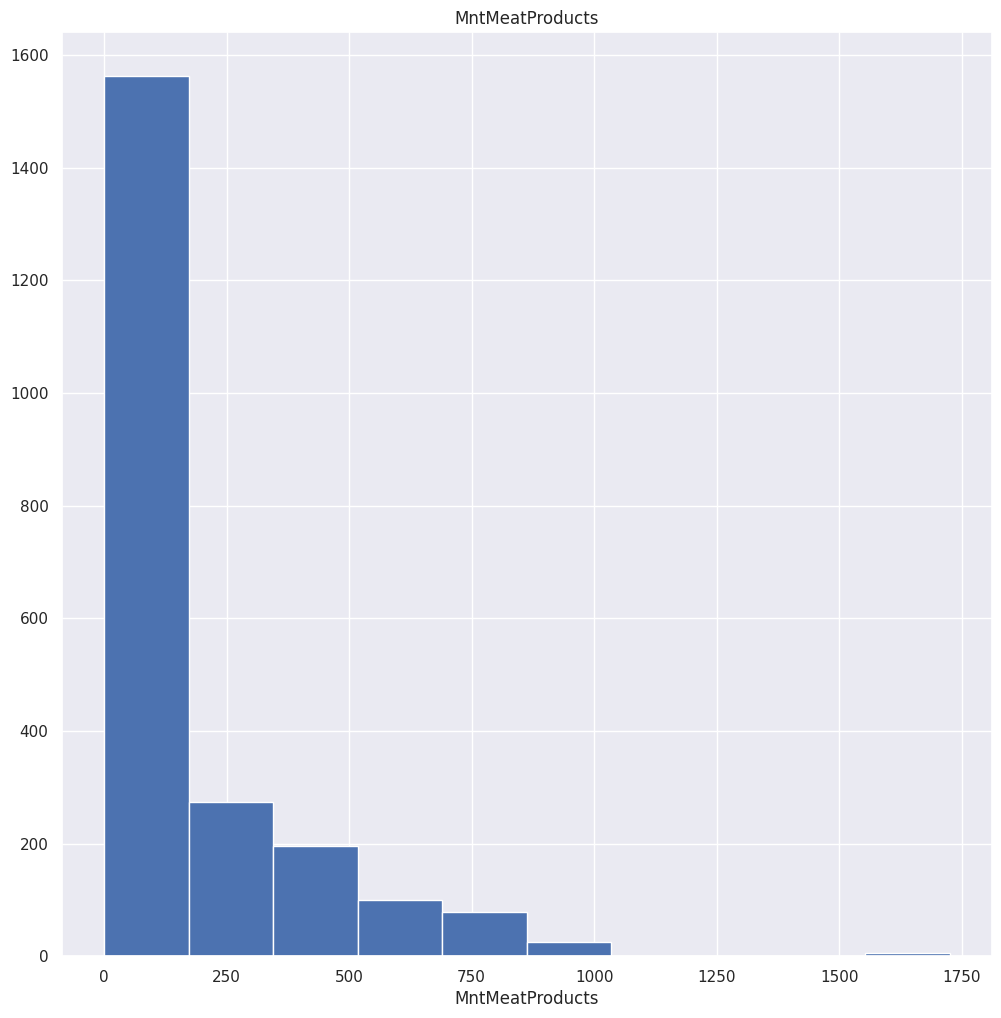

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
5%          0.000000
10%         0.000000
20%         2.000000
30%         3.000000
40%         7.000000
50%        12.000000
60%        20.000000
70%        37.000000
80%        65.000000
90%       120.000000
95%       168.050000
99%       226.220000
max       259.000000
Name: MntFishProducts, dtype: float64


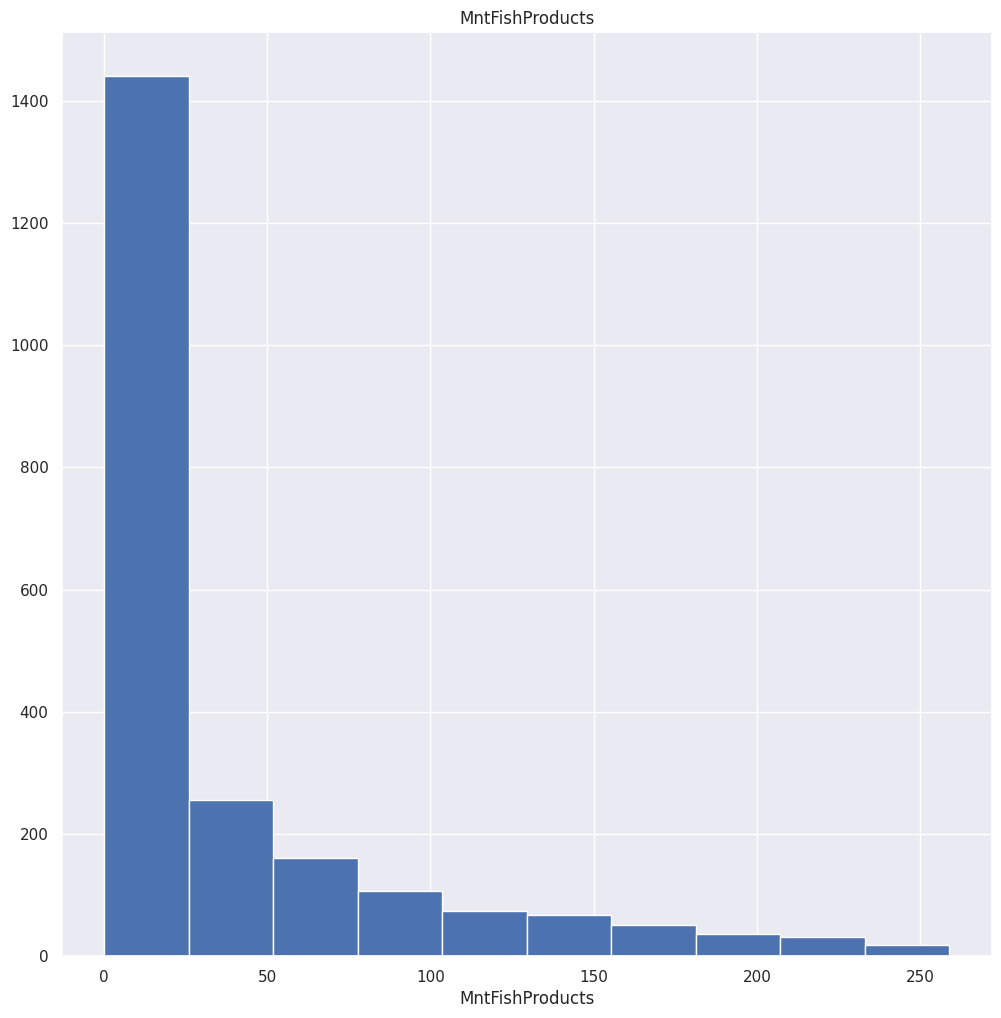

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
5%          0.000000
10%         0.000000
20%         1.000000
30%         2.000000
40%         5.000000
50%         8.000000
60%        14.000000
70%        26.000000
80%        44.200000
90%        89.000000
95%       126.000000
99%       177.220000
max       263.000000
Name: MntSweetProducts, dtype: float64


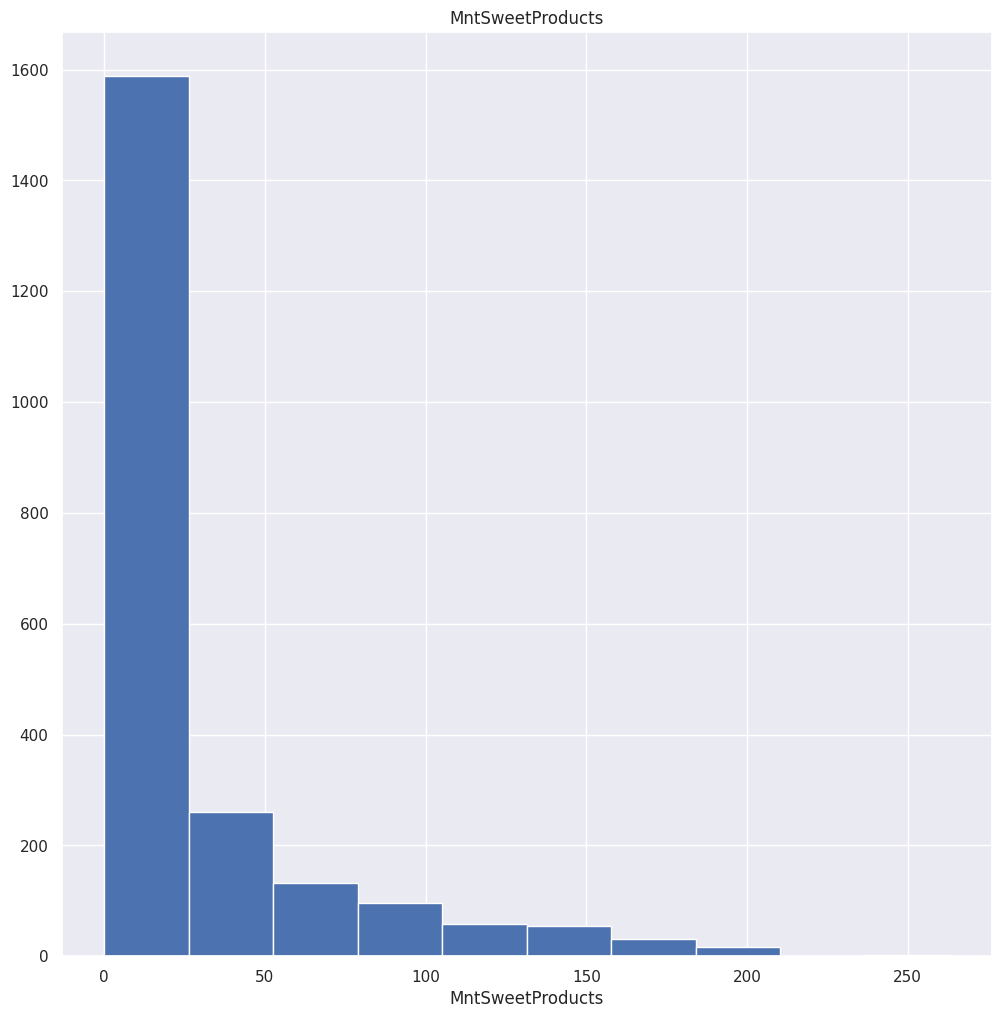

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
5%          1.000000
10%         3.000000
20%         6.000000
30%        11.000000
40%        17.000000
50%        24.000000
60%        34.000000
70%        46.000000
80%        73.000000
90%       122.000000
95%       165.050000
99%       227.000000
max       362.000000
Name: MntGoldProds, dtype: float64


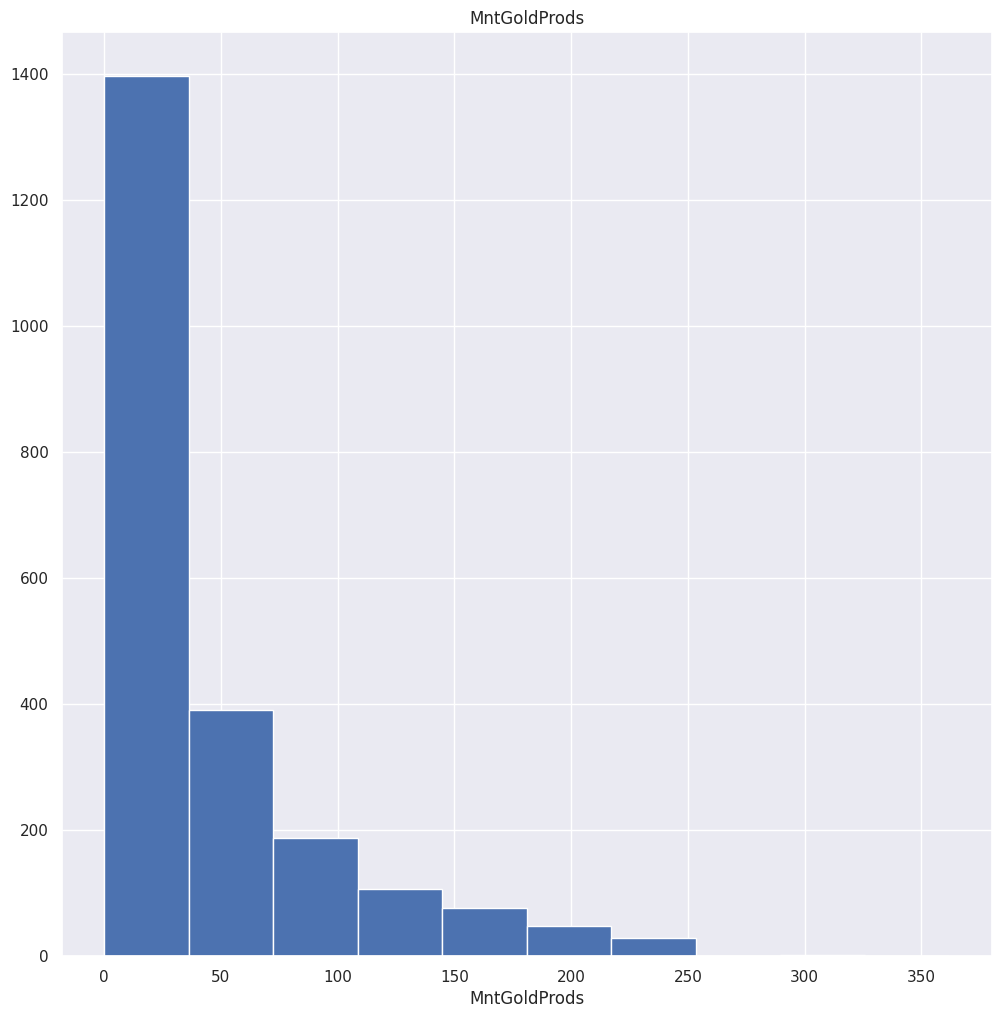

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         3.000000
80%         3.000000
90%         5.000000
95%         6.000000
99%        10.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64


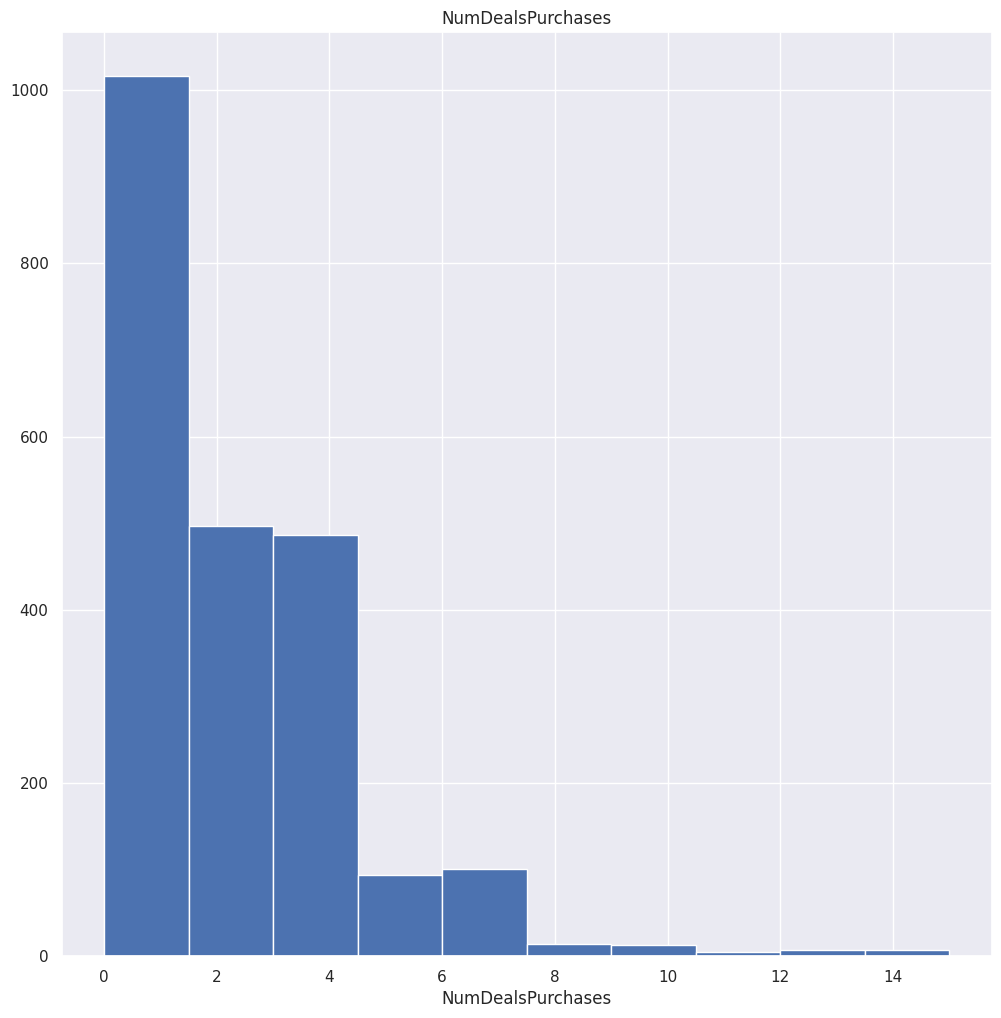

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
5%          1.000000
10%         1.000000
20%         2.000000
30%         2.000000
40%         3.000000
50%         4.000000
60%         4.000000
70%         5.000000
80%         6.000000
90%         8.000000
95%         9.000000
99%        11.000000
max        27.000000
Name: NumWebPurchases, dtype: float64


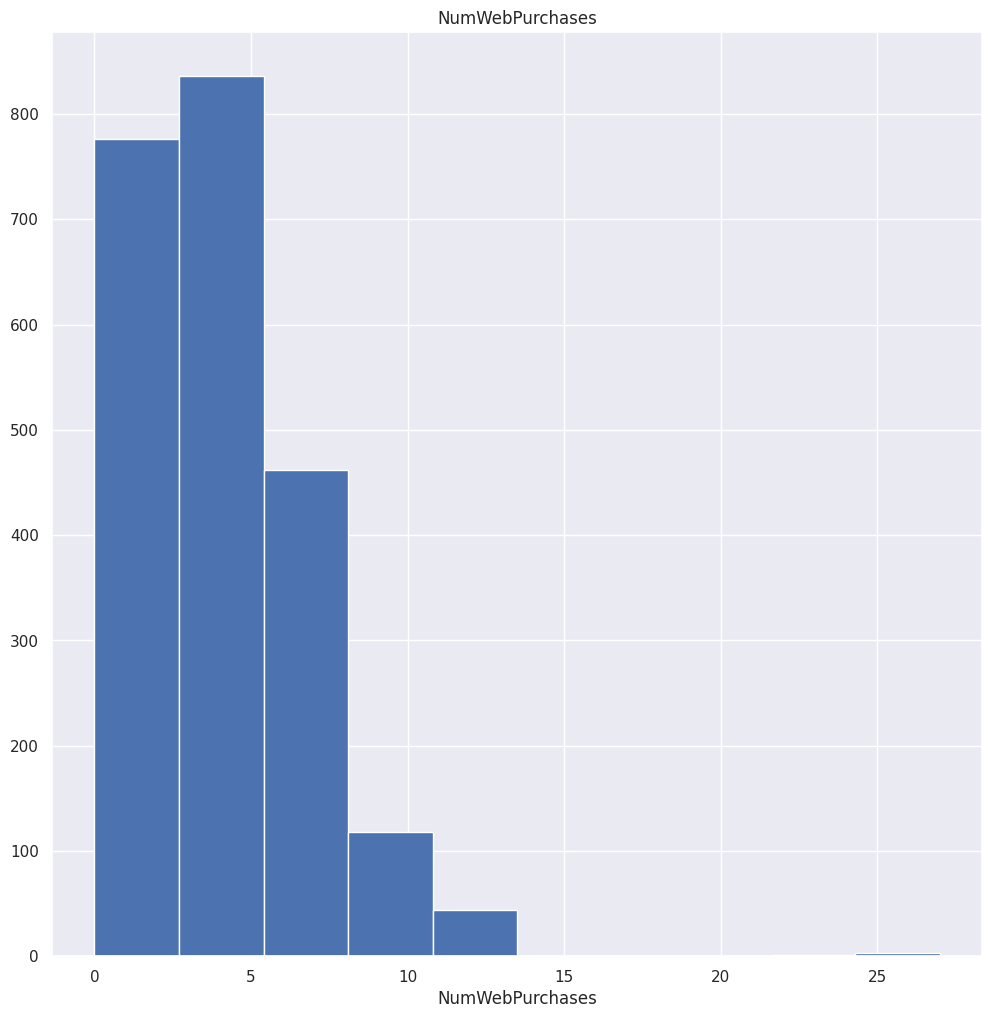

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         4.000000
80%         5.000000
90%         7.000000
95%         9.000000
99%        10.610000
max        28.000000
Name: NumCatalogPurchases, dtype: float64


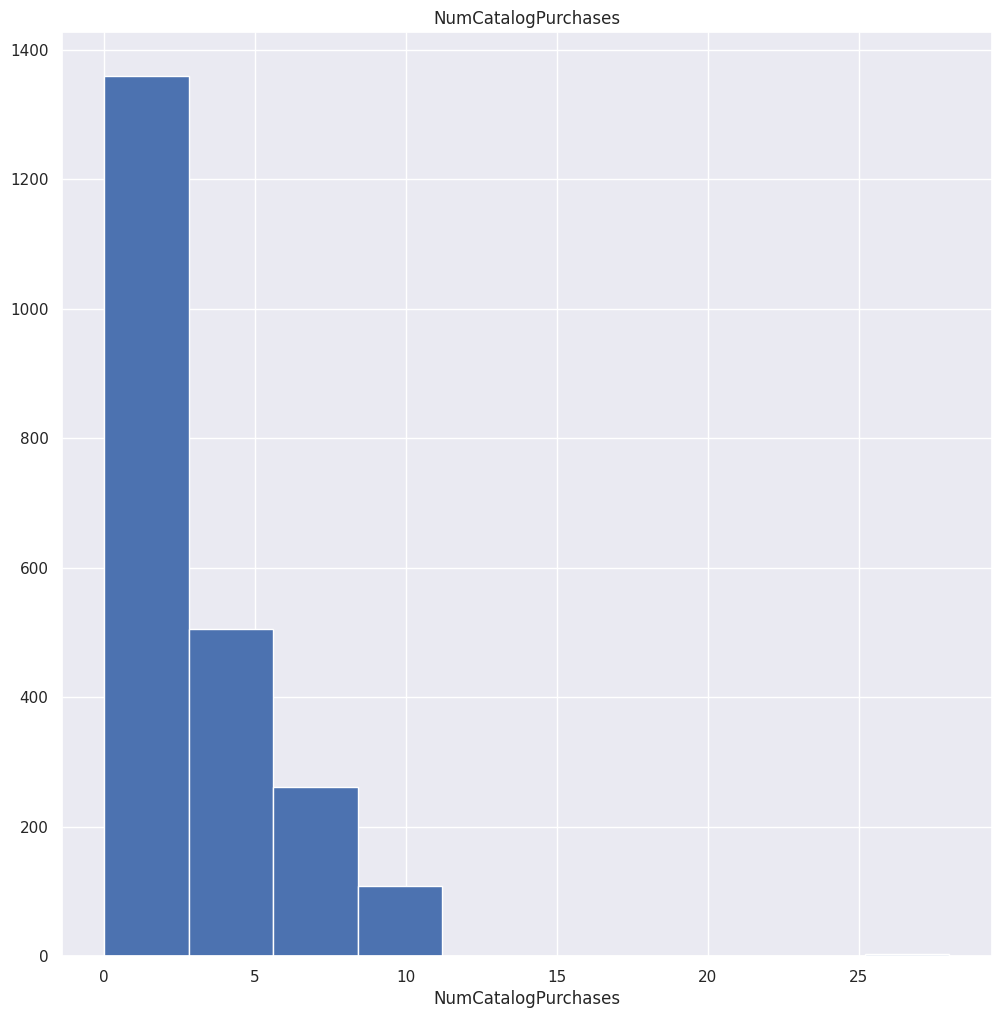

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
5%          2.000000
10%         2.000000
20%         3.000000
30%         3.000000
40%         4.000000
50%         5.000000
60%         6.000000
70%         7.000000
80%         9.000000
90%        11.000000
95%        12.000000
99%        13.000000
max        13.000000
Name: NumStorePurchases, dtype: float64


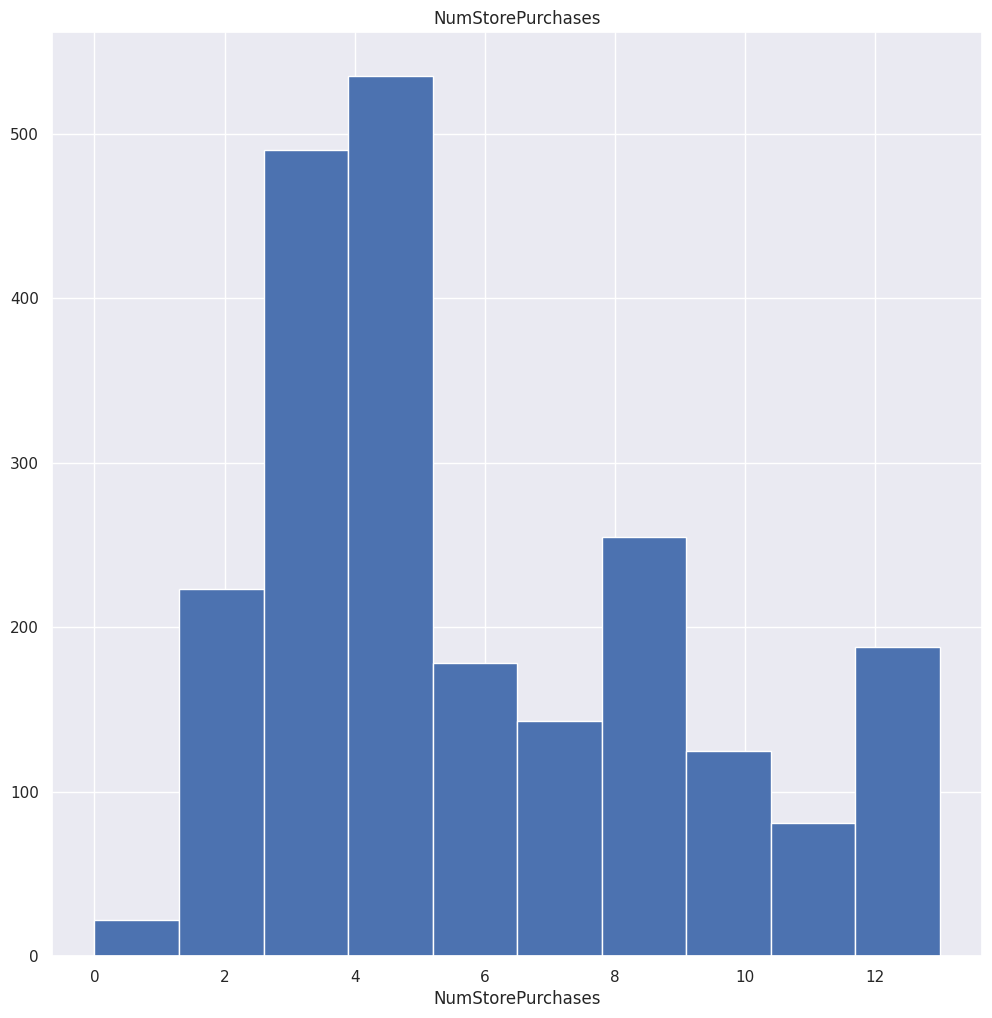

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
5%          1.000000
10%         2.000000
20%         3.000000
30%         4.000000
40%         5.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
95%         8.000000
99%         9.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64


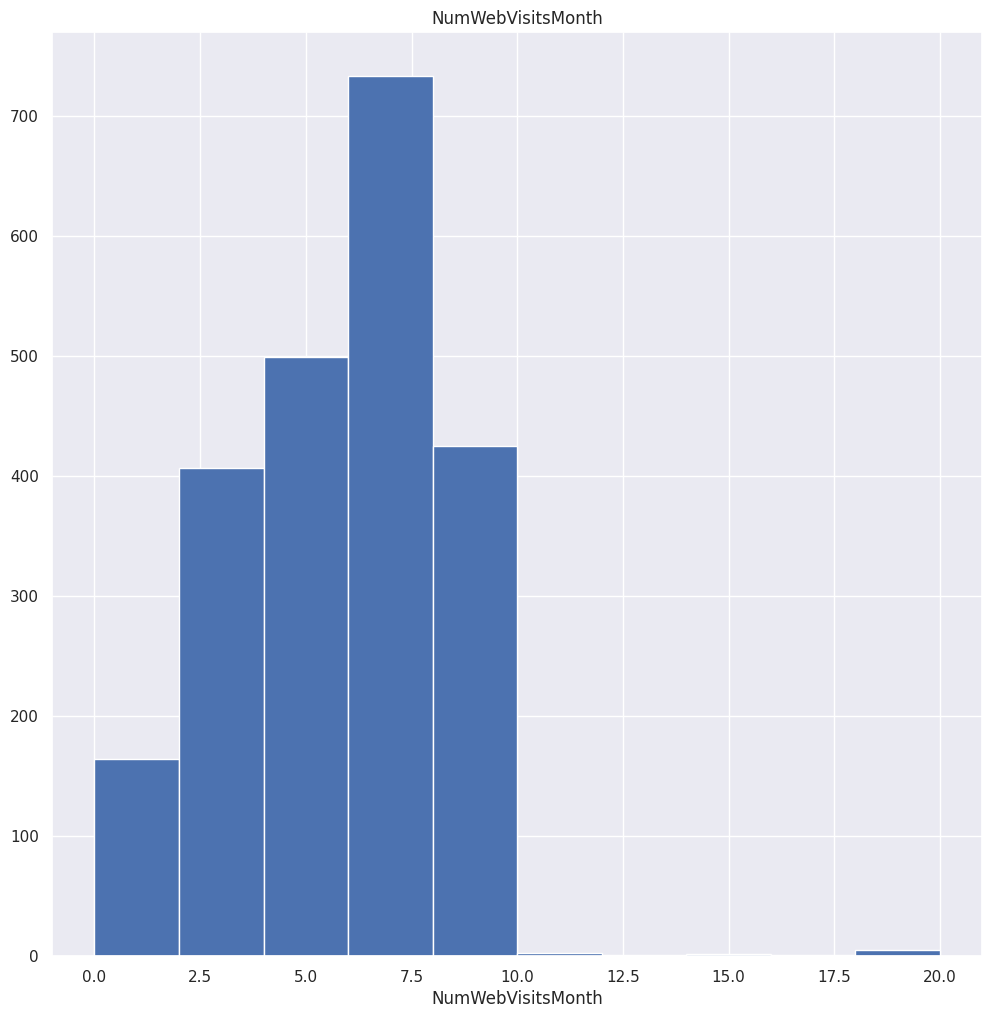

count    2240.000000
mean        9.875000
std         5.231872
min         0.000000
5%          3.000000
10%         4.000000
20%         5.000000
30%         6.000000
40%         7.000000
50%        10.000000
60%        11.000000
70%        13.000000
80%        15.000000
90%        17.000000
95%        19.000000
99%        22.000000
max        27.000000
Name: Total_Purchases, dtype: float64


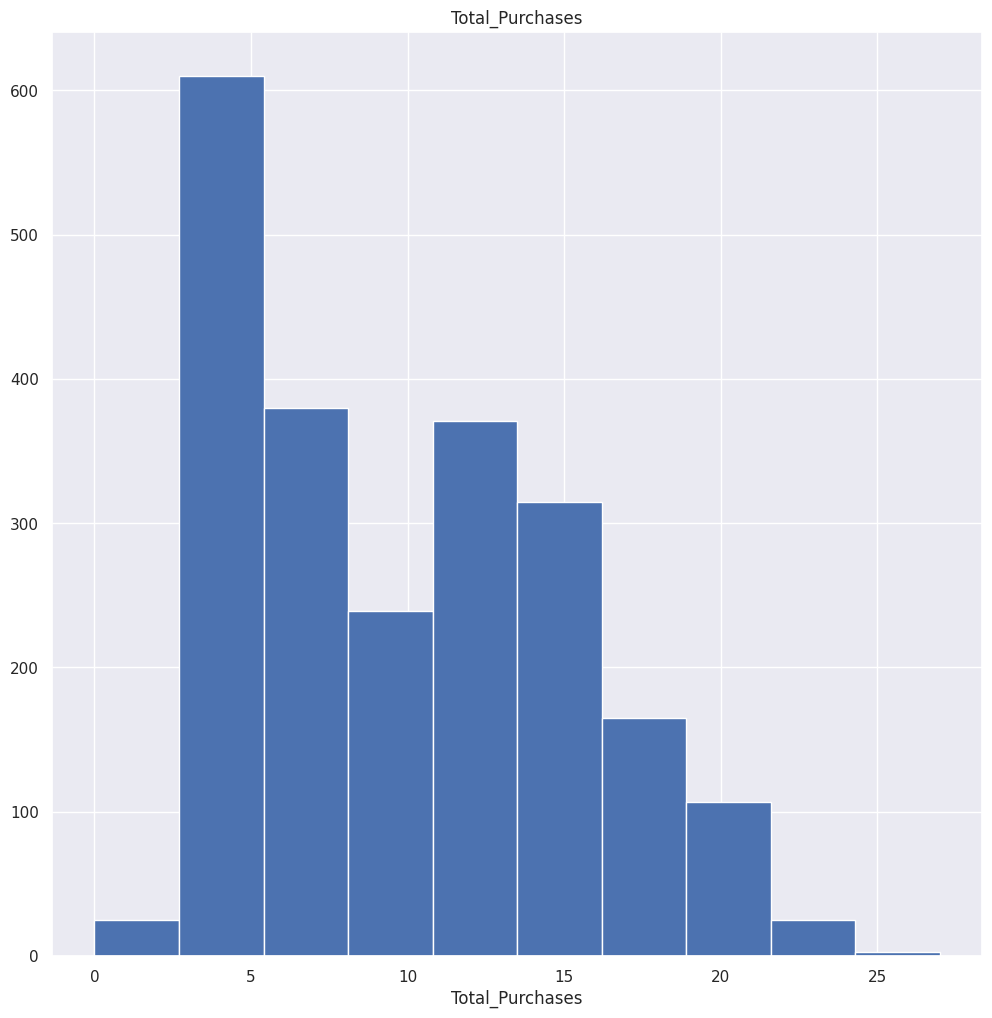

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
5%         22.000000
10%        34.900000
20%        55.000000
30%        91.000000
40%       194.600000
50%       396.000000
60%       635.400000
70%       926.000000
80%      1174.000000
90%      1536.200000
95%      1772.300000
99%      2126.000000
max      2525.000000
Name: Total_Mnt, dtype: float64


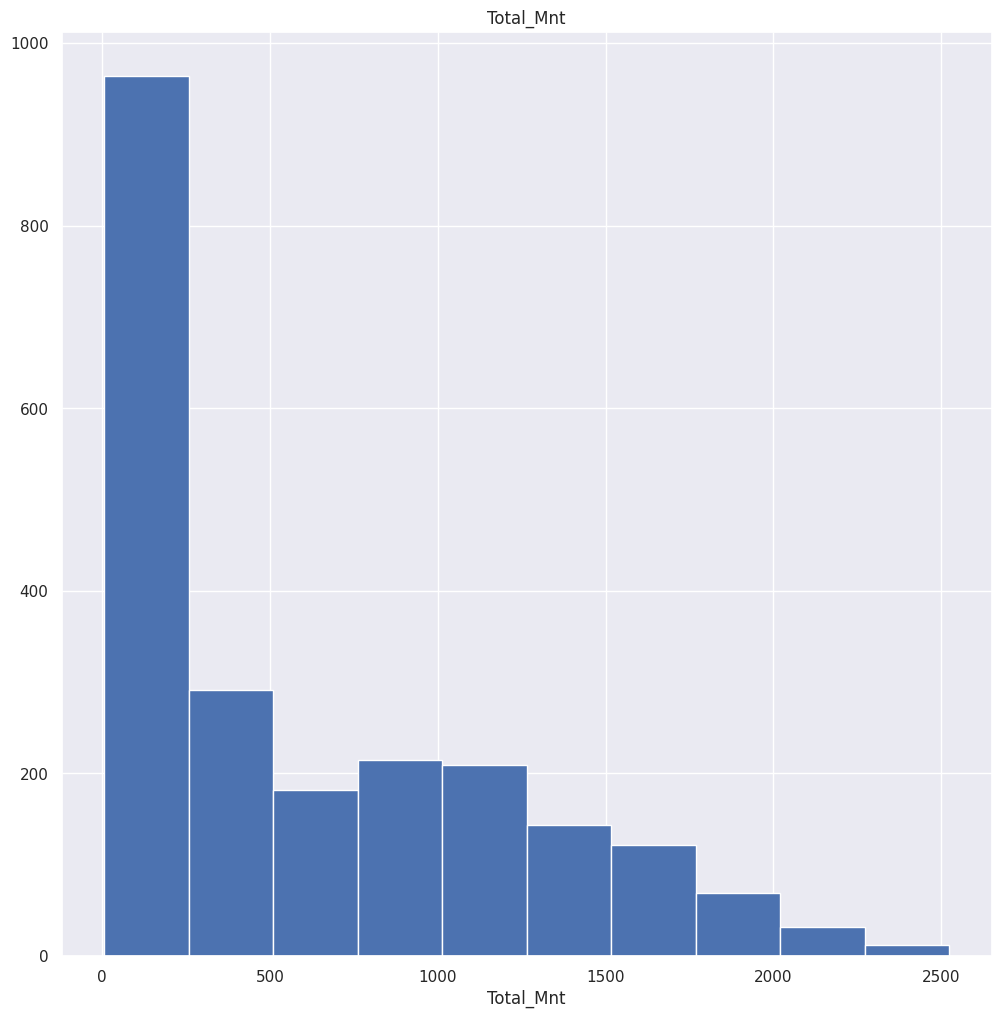

count    2240.000000
mean      354.582143
std       202.122512
min         1.000000
5%         39.000000
10%        72.900000
20%       143.000000
30%       220.000000
40%       285.600000
50%       356.500000
60%       424.000000
70%       496.000000
80%       565.000000
90%       636.100000
95%       668.000000
99%       692.000000
max       700.000000
Name: T, dtype: float64


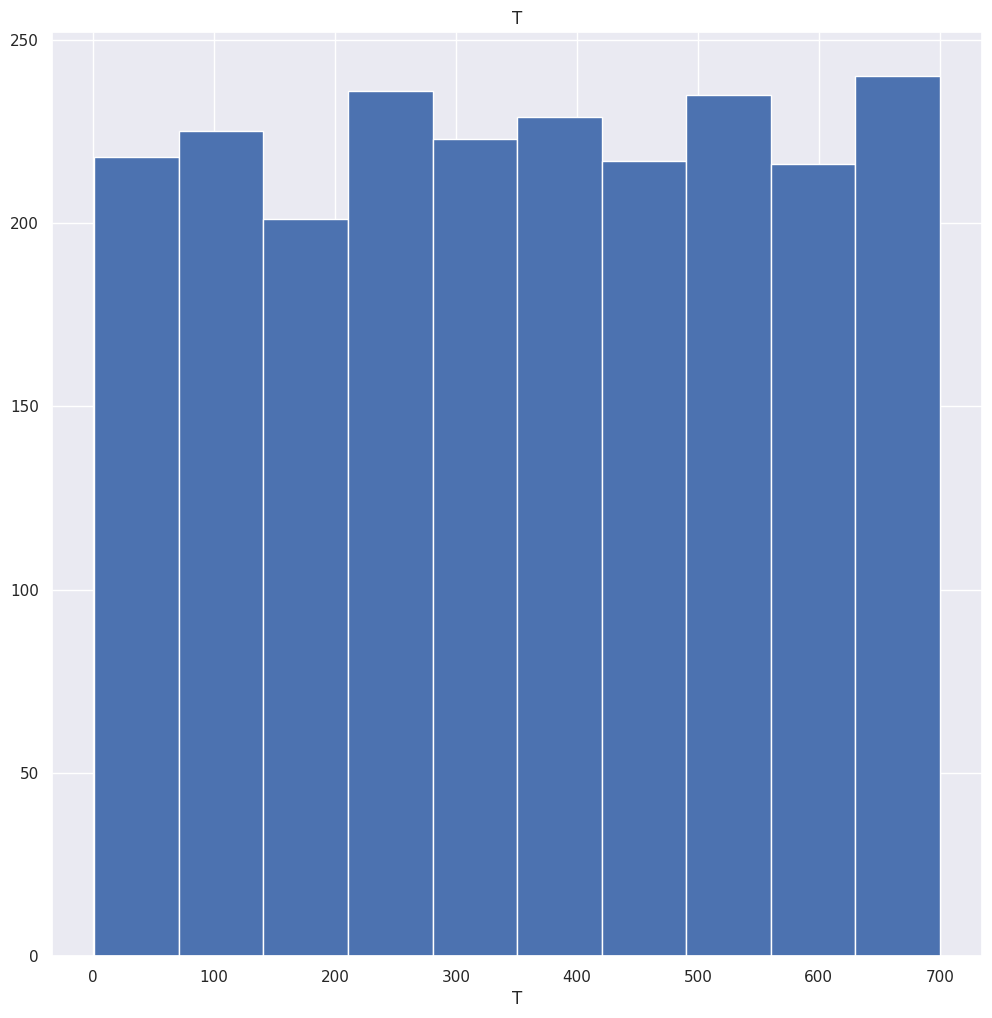

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
5%         26.000000
10%        30.000000
20%        35.000000
30%        38.000000
40%        41.000000
50%        44.000000
60%        48.000000
70%        52.000000
80%        57.000000
90%        62.000000
95%        64.000000
99%        69.000000
max       121.000000
Name: Age, dtype: float64


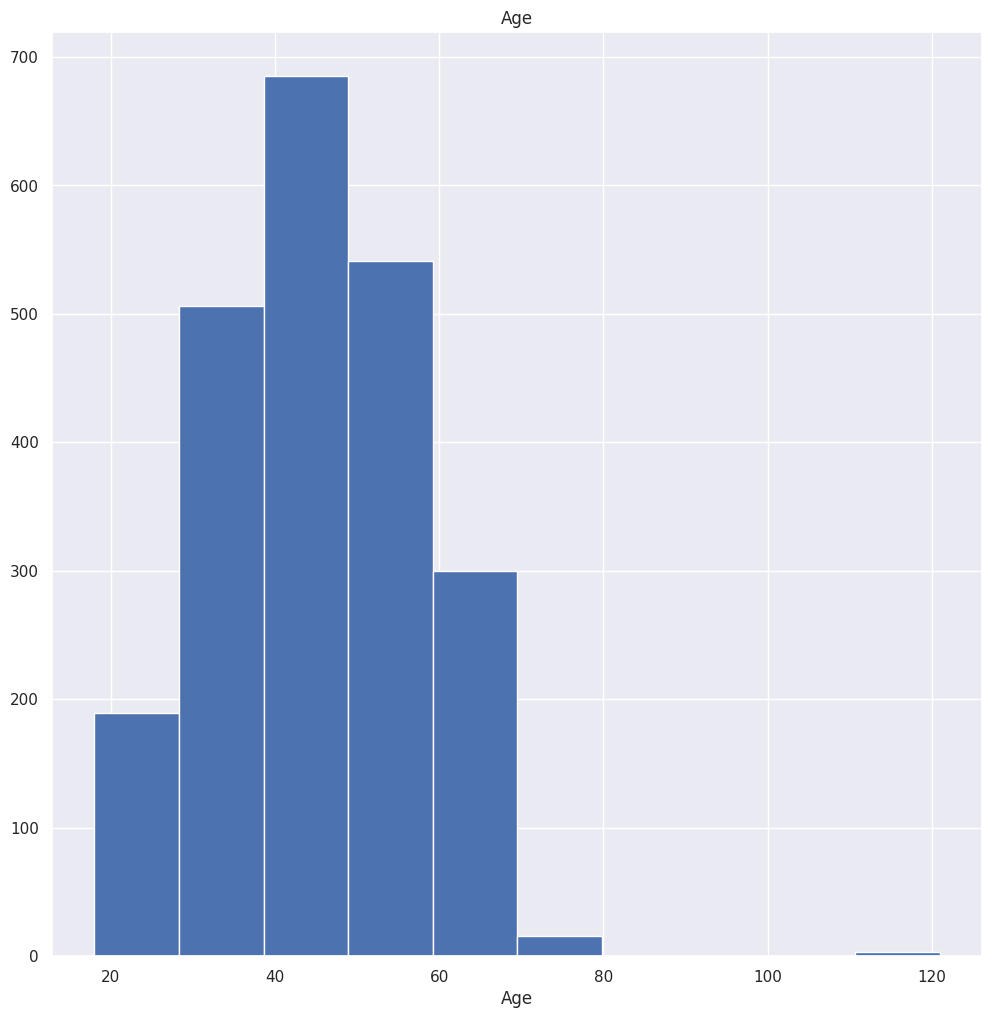

In [116]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in cat_cols]
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)


In [117]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 2240
Variables: 32
cat_cols: 13
num_cols: 18
cat_but_car: 0
num_but_cat: 11


In [118]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Response", col)

def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() // len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Response", col)


            TARGET_MEAN
Education              
2n Cycle       0.108374
Basic          0.037037
Graduation     0.134871
Master         0.154054
PhD            0.207819


                TARGET_MEAN
Marital_Status             
Absurd             0.500000
Alone              0.333333
Divorced           0.206897
Married            0.113426
Single             0.220833
Together           0.103448
Widow              0.246753
YOLO               0.500000


         TARGET_MEAN
Kidhome             
0           0.171694
1           0.122358
2           0.041667


          TARGET_MEAN
Teenhome             
0            0.204663
1            0.089320
2            0.096154


              TARGET_MEAN
AcceptedCmp3             
0                0.123736
1                0.472393


              TARGET_MEAN
AcceptedCmp4             
0                0.131211
1                0.371257


              TARGET_MEAN
AcceptedCmp5             
0                0.116514
1                0.564417


           

In [119]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Response", col)


                   ID
Response             
0         5622.009444
1         5421.820359


                Income
Response              
0         50758.584732
1         60216.956587


            Recency
Response           
0         51.514690
1         35.383234


            MntWines
Response            
0         269.104407
1         502.703593


          MntFruits
Response           
0         24.216684
1         38.203593


          MntMeatProducts
Response                 
0              144.624344
1              294.353293


          MntFishProducts
Response                 
0               34.980063
1               52.050898


          MntSweetProducts
Response                  
0                25.035152
1                38.634731


          MntGoldProds
Response              
0            40.968520
1            61.446108


          NumDealsPurchases
Response                   
0                  2.323190
1                  2.335329


          NumWebPurchases
Response  

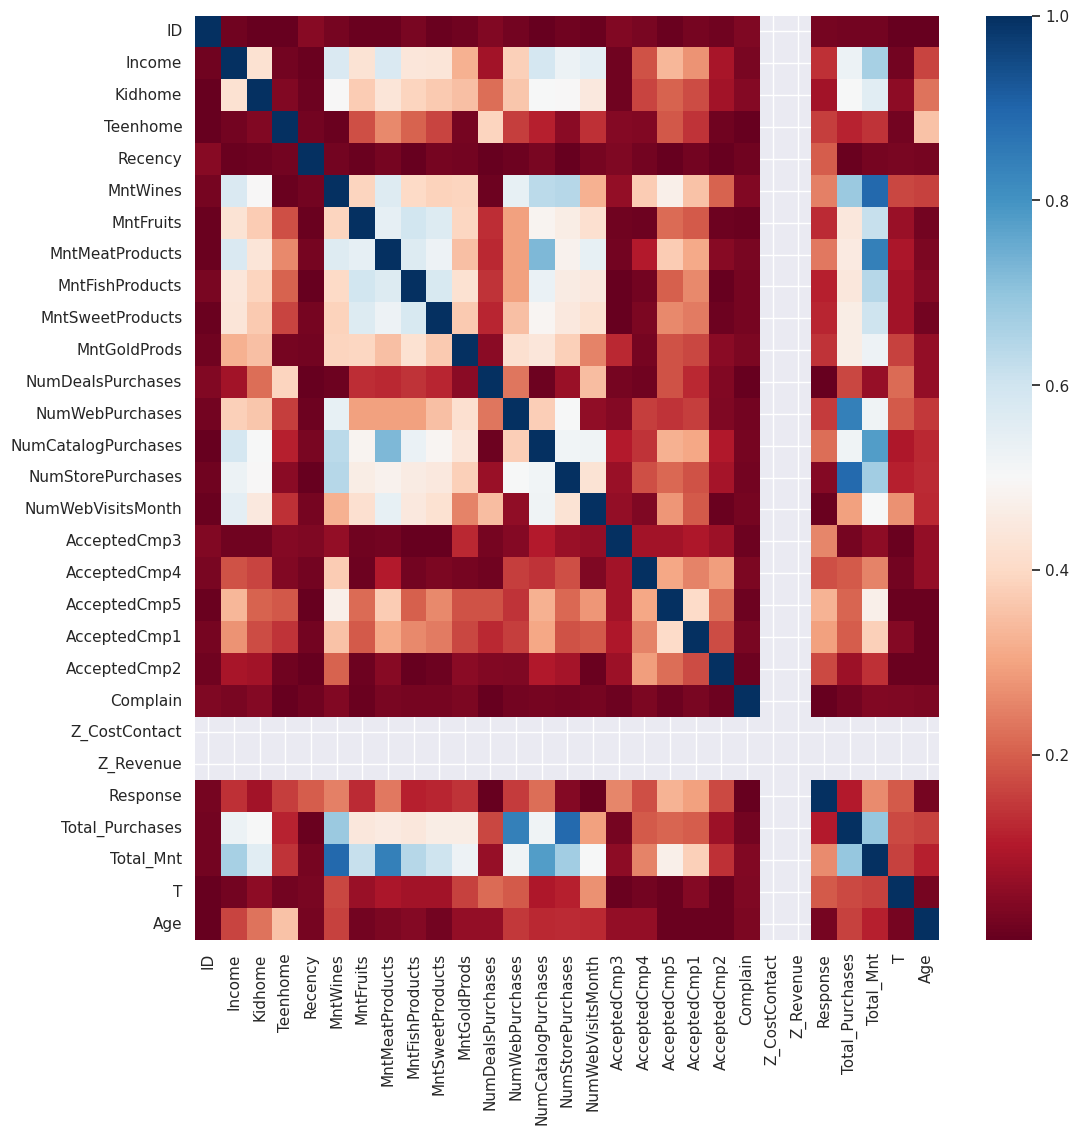

In [120]:
num_cols = [col for col in df.columns if df[col].dtype in [int, float]]

corr = df[num_cols].corr().abs()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()


In [121]:
# One Hot Encoder öncesinde cat kolondan targetı cıkart!!!!!!!!!#######################

cat_cols = [col for col in cat_cols if "Response" not in col]

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

check_df(df)

##################### Shape #####################
(2240, 41)
##################### Types #####################
ID                                  int64
Income                            float64
Dt_Customer                datetime64[ns]
Recency                             int64
MntWines                            int64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
Response                            int64
Total_Purchases                     int64
Total_Mnt                           int64
T                                   int64
Age                                 int64
Education_Basic                      bool
Educati

In [122]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)
cat_cols = [col for col in cat_cols if "Response" not in col]

Observations: 2240
Variables: 41
cat_cols: 22
num_cols: 18
cat_but_car: 0
num_but_cat: 1


In [123]:
df.drop('Dt_Customer', axis=1, inplace=True)

In [124]:
for col in num_cols:
    print(col, check_outlier(df, col, 0.05, 0.95))

ID False
Income True
Recency False
MntWines False
MntFruits False
MntMeatProducts True
MntFishProducts False
MntSweetProducts False
MntGoldProds False
NumDealsPurchases True
NumWebPurchases True
NumCatalogPurchases True
NumStorePurchases False
NumWebVisitsMonth True
Total_Purchases False
Total_Mnt False
T False
Age False


In [125]:
col_True = ['Income', 'MntMeatProducts', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth'  ]

for col in col_True:
  replace_with_thresholds(df, col)

In [126]:
for col in num_cols:
    print(col, check_outlier(df, col, 0.05, 0.95))

ID False
Income False
Recency False
MntWines False
MntFruits False
MntMeatProducts False
MntFishProducts False
MntSweetProducts False
MntGoldProds False
NumDealsPurchases False
NumWebPurchases False
NumCatalogPurchases False
NumStorePurchases False
NumWebVisitsMonth False
Total_Purchases False
Total_Mnt False
T False
Age False


In [127]:
####################
# Standartlaştırma Standart Scaler ile:
####################
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

y = df['Response']
X = df.drop(['Response'], axis=1)

check_df(X)

##################### Shape #####################
(2240, 39)
##################### Types #####################
ID                         float64
Income                     float64
Recency                    float64
MntWines                   float64
MntFruits                  float64
MntMeatProducts            float64
MntFishProducts            float64
MntSweetProducts           float64
MntGoldProds               float64
NumDealsPurchases          float64
NumWebPurchases            float64
NumCatalogPurchases        float64
NumStorePurchases          float64
NumWebVisitsMonth          float64
Total_Purchases            float64
Total_Mnt                  float64
T                          float64
Age                        float64
Education_Basic               bool
Education_Graduation          bool
Education_Master              bool
Education_PhD                 bool
Marital_Status_Alone          bool
Marital_Status_Divorced       bool
Marital_Status_Married        bool
Marital_Status

In [128]:
######################################################
# 3. Base Models
######################################################


def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   # ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(X, y, scoring="accuracy")

Base Models....
accuracy: 0.8946 (LR) 
accuracy: 0.8607 (KNN) 
accuracy: 0.875 (SVC) 
accuracy: 0.8228 (CART) 
accuracy: 0.8723 (RF) 
accuracy: 0.8844 (Adaboost) 
accuracy: 0.8817 (GBM) 
accuracy: 0.883 (XGBoost) 
[LightGBM] [Info] Number of positive: 222, number of negative: 1271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 1493, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148694 -> initscore=-1.744882
[LightGBM] [Info] Start training from score -1.744882
[LightGBM] [Info] Number of positive: 223, number of negative: 1270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
An

In [129]:
######################################################
# 4. Automated Hyperparameter Optimization
######################################################

knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500]}


classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]



def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## KNN ##########
roc_auc (Before): 0.7638
roc_auc (After): 0.7768
KNN best params: {'n_neighbors': 7}

########## CART ##########
roc_auc (Before): 0.6437
roc_auc (After): 0.7484
CART best params: {'max_depth': 3, 'min_samples_split': 3}

########## RF ##########
roc_auc (Before): 0.8704
roc_auc (After): 0.8791
RF best params: {'max_depth': None, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 300}

########## XGBoost ##########
roc_auc (Before): 0.8888
roc_auc (After): 0.8901
XGBoost best params: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

########## LightGBM ##########
[LightGBM] [Info] Number of positive: 222, number of negative: 1271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number

In [130]:
######################################################
# 5. Stacking & Ensemble Learning
######################################################

def voting_classifier(best_models, X, y):
    print("Voting Classifier...")

    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)

    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

voting_clf = voting_classifier(best_models, X, y)

Voting Classifier...
[LightGBM] [Info] Number of positive: 334, number of negative: 1906
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2375
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149107 -> initscore=-1.741621
[LightGBM] [Info] Start training from score -1.741621
[LightGBM] [Info] Number of positive: 222, number of negative: 1271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 1493, number of used features: 36
[Ligh

In [131]:
######################################################
# 6. Prediction for a New Observation
######################################################

X.columns
random_user = X.sample(1, random_state=45)
voting_clf.predict(random_user)

array([0])

In [132]:
joblib.dump(voting_clf, "voting_clf2.pkl")

new_model = joblib.load("voting_clf2.pkl")
new_model.predict(random_user)

array([0])

In [133]:
#################################################
# Pipeline Main Function
################################################

def main():
    #df = pd.read_csv("datasets/diabetes.csv")
    y = df["Response"]
    X = df.drop(["Response"], axis=1)
    base_models(X, y)
    best_models = hyperparameter_optimization(X, y)
    voting_clf = voting_classifier(best_models, X, y)
    joblib.dump(voting_clf, "voting_clf.pkl")
    return voting_clf

if __name__ == "__main__":
    print("İşlem başladı")
    main()

İşlem başladı
Base Models....
roc_auc: 0.899 (LR) 
roc_auc: 0.7638 (KNN) 
roc_auc: 0.8879 (SVC) 
roc_auc: 0.6496 (CART) 
roc_auc: 0.8719 (RF) 
roc_auc: 0.8683 (Adaboost) 
roc_auc: 0.8867 (GBM) 
roc_auc: 0.8888 (XGBoost) 
[LightGBM] [Info] Number of positive: 222, number of negative: 1271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 1493, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148694 -> initscore=-1.744882
[LightGBM] [Info] Start training from score -1.744882
[LightGBM] [Info] Number of positive: 223, number of negative: 1270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overh